In [1]:
from osgeo import gdal, osr
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors
import rasterio
import fiona
import pandas as pd

from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask

# plt.style.use('ggplot')

In [2]:
import sys
sys.path.append('/Users/allen/Documents/Python/geoPackage')
sys.path.append('/Users/allen/Documents/Python/Plotgallary')
from geoPackage.io import ReadFile
from geoPackage.raster import Geoprocess
from matplotlibconfig import basic

basic()

## Results plot

In [3]:
gauge_satellite_rmse= '../intercomparison/Harvey/gauge_satellite_rmse.tif'
radar_satellite_rmse= '../intercomparison/Harvey/satellite_radar_rmse.tif'
gauge_radar_rmse= '../intercomparison/Harvey/gauge_radar_rmse.tif'
gauge_rmse= '../TCresults/TCresultsHarvey/rmse_gauge_mtc.tif'
satellite_rmse= '../TCresults/TCresultsHarvey/rmse_sat_mtc.tif'
radar_rmse= '../TCresults/TCresultsHarvey/rmse_radar_mtc.tif'

gauge_satellite_mae= '../intercomparison/Harvey/gauge_satellite_mae.tif'
radar_satellite_mae= '../intercomparison/Harvey/satellite_radar_mae.tif'
gauge_radar_mae= '../intercomparison/Harvey/gauge_radar_mae.tif'

gauge_satellite_bias= '../intercomparison/Harvey/gauge_satellite_bias.tif'
radar_satellite_bias= '../intercomparison/Harvey/satellite_radar_bias.tif'
gauge_radar_bias= '../intercomparison/Harvey/gauge_radar_bias.tif'

gauge_satellite_rmse_norm= '../intercomparison/Harvey/gauge_satellite_norm_rmse.tif'
radar_satellite_rmse_norm= '../intercomparison/Harvey/radar_satellite_norm_rmse_cliped.tif'
gauge_radar_rmse_norm= '../intercomparison/Harvey/gauge_radar_norm rmse.tif'

gauge_satellite_cc= '../intercomparison/Harvey/gauge_satellite_r.tif'
radar_satellite_cc= '../intercomparison/Harvey/satellite_radar_r.tif'
gauge_radar_cc= '../intercomparison/Harvey/gauge_radar_r.tif'
gauge_cc= '../TCresults/TCresultsHarvey/cc_gauge_mtc.tif'
satellite_cc= '../TCresults/TCresultsHarvey/cc_sat_mtc.tif'
radar_cc= '../TCresults/TCresultsHarvey/cc_radar_mtc.tif'
gauge_radar_pod= '../intercomparison/Harvey/gauge_radar_pod.tif'
gauge_radar_csi= '../intercomparison/Harvey/gauge_radar_csi.tif'
gauge_radar_far= '../intercomparison/Harvey/gauge_radar_far.tif'
radar_satellite_pod= '../intercomparison/Harvey/satellite_radar_pod.tif'
radar_satellite_csi= '../intercomparison/Harvey/satellite_radar_csi.tif'
radar_satellite_far= '../intercomparison/Harvey/satellite_radar_far.tif'
gauge_satellite_pod= '../intercomparison/Harvey/gauge_satellite_pod.tif'
gauge_satellite_csi= '../intercomparison/Harvey/gauge_satellite_csi.tif'
gauge_satellite_far= '../intercomparison/Harvey/gauge_satellite_far.tif'
gauge_sum= '../intercomparison/Harvey/gauge_satellite_sum_gauge.tif'
radar_sum= '../intercomparison/Harvey/satellite_radar_sum_radar.tif'
satellite_sum= '../intercomparison/Harvey/gauge_satellite_sum_satellite.tif'

harveyimpact= '../../harveyimpact/harveyimpact.shp'
restricted= '../shp/restricted.shp'
NCEP_pnts= '../../NCEP_gauge_locations.shp'

In [4]:
def metrics(pth, shp):
#     product= gdal.Open(pth).ReadAsArray()
    product= mask_raster(pth, shp)
    product= product.reshape(-1,1)
    product= product[~np.isnan(product)]
    product= product[product>0]
#     med= np.nanmedian(product)
#     seventyFive= np.nanquantile(product, .75)
#     twentyFive= np.nanquantile(product, .25)
#     avg= np.nanmean(product)

    return product
#     return avg, twentyFive, med, seventyFive,

def bias(a, b):
    a= mask_raster(a, restricted)
    b= mask_raster(b, restricted)
    product= b-a
#     product= product[product>0]
    product= product.reshape(-1,1)
    product= product[~np.isnan(product)]
    med= np.nanmedian(product)
    seventyFive= np.nanquantile(product, .75)
    twentyFive= np.nanquantile(product, .25)
    
    return twentyFive, med, seventyFive

def boxplot():
    fig= plt.figure()
    ax= fig.add_subplot()
    ax.boxplot(product)
    ax.set_xlabel(label)

In [5]:
RMSEresults= [np.log(metrics(each, restricted)) for each in [gauge_radar_rmse, gauge_satellite_rmse, radar_satellite_rmse]]
CCresults= [metrics(each, restricted) for each in [gauge_radar_cc, gauge_satellite_cc, radar_satellite_cc]]
radar_rmse_arr= metrics(radar_rmse, restricted)
sat_rmse_arr= metrics(satellite_rmse, restricted)
gauge_rmse_arr= metrics(gauge_rmse, restricted)
RMSEresults.append(radar_rmse_arr)
RMSEresults.append(sat_rmse_arr)
RMSEresults.append(gauge_rmse_arr)

radar_cc_arr= metrics(radar_cc, restricted)
sat_cc_arr= metrics(satellite_cc, restricted)
gauge_cc_arr= metrics(gauge_cc, restricted)
CCresults.append(radar_cc_arr)
CCresults.append(sat_cc_arr)
CCresults.append(gauge_cc_arr)

NameError: name 'mask_raster' is not defined

In [7]:
PODresults= [metrics(each,restricted) for each in [gauge_radar_pod, gauge_satellite_pod, radar_satellite_pod]]
FARresults= [metrics(each,restricted) for each in [gauge_radar_far, gauge_satellite_far, radar_satellite_far]]
CSIresults= [metrics(each,restricted) for each in [gauge_radar_csi, gauge_satellite_csi, radar_satellite_csi]]

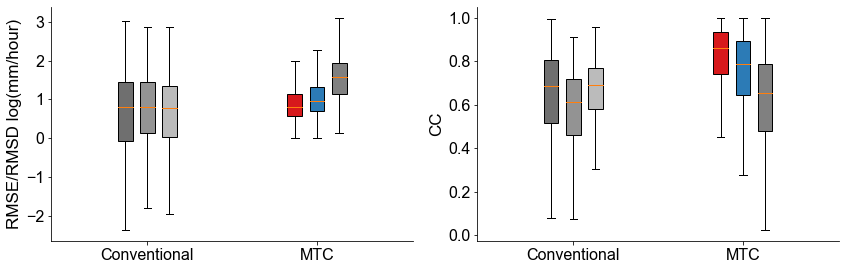

In [10]:
colors= ['#6F6F6F', '#939393', '#BBBBBB', '#D7191C','#2C7BB6','grey']
fig, ax = plt.subplots(1,2,figsize=(12,4))
bx1=ax[0].boxplot(RMSEresults, showfliers=False, widths=0.1, positions= [0.85, 1, 1.15, 2.0, 2.15, 2.3], patch_artist=True)
ax[0].set_xticks([1,2.15])
ax[0].set_xticklabels(['Conventional', 'MTC'])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel('RMSE/RMSD log(mm/hour)')
ax[0].bar([],[], label='MRMS', color='#D7191C')

for i, patch in enumerate(bx1['boxes']):
    patch.set_facecolor(colors[i])
    
# ax[0].legend([bx1["boxes"][0], bx1["boxes"][1], 
#            bx1['boxes'][2], bx1['boxes'][3],
#            bx1['boxes'][4], bx1['boxes'][5]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',
#                                                'MRMS(MTC)', 'IMERG(MTC)', 'NCEP(MTC)'], loc='upper right')

bx2= ax[1].boxplot(CCresults, widths=.1, showfliers=False, positions= [0.85, 1, 1.15, 2.0, 2.15, 2.3], patch_artist=True)
# ax[1].set_xlim([0.5,3.5])
ax[1].set_xticks([1,2.15])

ax[1].set_xticklabels(['Conventional', 'MTC'])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel('CC')

for i, patch in enumerate(bx2['boxes']):
    patch.set_facecolor(colors[i])
# ax[1].legend([bx2["boxes"][0], bx2["boxes"][1], 
#            bx2['boxes'][2], bx2['boxes'][3],
#            bx2['boxes'][4], bx2['boxes'][5]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',
#                                                'MRMS(MTC)', 'IMERG(MTC)', 'NCEP(MTC)'], loc='upper right')

# fig.savefig('HarveyBoxPlot2.png', dpi=300)

In [91]:
np.exp(0.42)

1.5219615556186337

In [79]:
len(RMSEresults)

6

In [85]:
np.exp(np.nanmedian(RMSEresults[5]))

4.7964263

In [15]:
np.nanmedian(CCresults[5])

0.6542969

In [120]:
comb= []
comb.append(PODresults)
comb.append(FARresults)
comb.append(CSIresults)
comb

[[array([0.71435547, 0.71435547, 0.6923828 , ..., 0.47216797, 0.45458984,
         0.4411621 ], dtype=float32),
  array([0.35717773, 0.5       , 0.54541016, ..., 0.45654297, 0.46801758,
         0.45654297], dtype=float32),
  array([0.57128906, 0.4284668 , 0.5385742 , ..., 0.85009766, 0.89208984,
         0.89453125], dtype=float32)],
 [array([0.41186523, 0.4736328 , 0.5263672 , ..., 0.32006836, 0.39990234,
         0.39990234], dtype=float32),
  array([0.7060547 , 0.7895508 , 0.68408203, ..., 0.16003418, 0.11999512,
         0.16003418], dtype=float32),
  array([0.4284668 , 0.25      , 0.3635254 , ..., 0.32006836, 0.35302734,
         0.32006836], dtype=float32)],
 [array([0.47607422, 0.43481445, 0.39135742, ..., 0.3864746 , 0.34887695,
         0.3408203 ], dtype=float32),
  array([0.19226074, 0.1739502 , 0.25      , ..., 0.41992188, 0.4399414 ,
         0.41992188], dtype=float32),
  array([0.39990234, 0.375     , 0.41186523, ..., 0.6069336 , 0.60009766,
         0.62939453], dtype=

In [122]:
comb[0]+comb[1]+comb[2]

[array([0.71435547, 0.71435547, 0.6923828 , ..., 0.47216797, 0.45458984,
        0.4411621 ], dtype=float32),
 array([0.35717773, 0.5       , 0.54541016, ..., 0.45654297, 0.46801758,
        0.45654297], dtype=float32),
 array([0.57128906, 0.4284668 , 0.5385742 , ..., 0.85009766, 0.89208984,
        0.89453125], dtype=float32),
 array([0.41186523, 0.4736328 , 0.5263672 , ..., 0.32006836, 0.39990234,
        0.39990234], dtype=float32),
 array([0.7060547 , 0.7895508 , 0.68408203, ..., 0.16003418, 0.11999512,
        0.16003418], dtype=float32),
 array([0.4284668 , 0.25      , 0.3635254 , ..., 0.32006836, 0.35302734,
        0.32006836], dtype=float32),
 array([0.47607422, 0.43481445, 0.39135742, ..., 0.3864746 , 0.34887695,
        0.3408203 ], dtype=float32),
 array([0.19226074, 0.1739502 , 0.25      , ..., 0.41992188, 0.4399414 ,
        0.41992188], dtype=float32),
 array([0.39990234, 0.375     , 0.41186523, ..., 0.6069336 , 0.60009766,
        0.62939453], dtype=float32)]

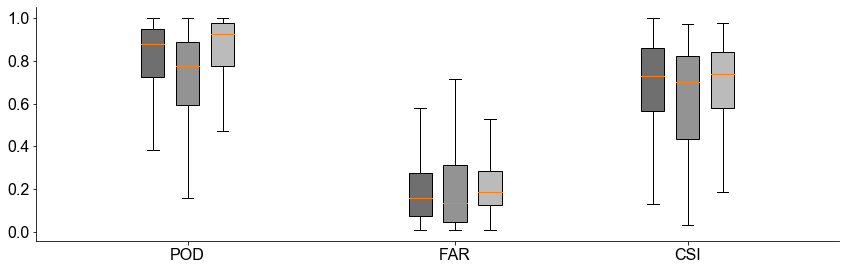

In [147]:
fig=plt.figure(figsize=(12,4))
ax= fig.add_subplot()
bx= ax.boxplot(comb[0]+comb[1]+comb[2], positions= [0.85, 1, 1.15, 2.0, 2.15, 2.3, 3, 3.15, 3.3], widths=0.1,
               patch_artist= True, showfliers=False)

for i, patch in enumerate(bx['boxes']):
    j= i%3
    patch.set_facecolor(colors[j])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([1,2.15, 3.15])
ax.set_xticklabels(['POD', 'FAR', 'CSI'])
# ax.legend([bx["boxes"][0], bx["boxes"][1], 
#            bx['boxes'][2]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',], loc='upper center')
fig.savefig('HarveyBoxPlot2.png', dpi=300)

In [14]:
np.nanmedian(metrics(radar_satellite_csi,restricted))

0.7368164

In [6]:
def mask_raster(raster_name, shapes_name, crop=False):
    raster= rasterio.open(raster_name)
    with fiona.open(shapes_name, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]
    
    out_img, out_transform = mask(raster, shapes, crop=False)
    
    return out_img.squeeze()

In [7]:
mx_radar= gdal.Open(radar_sum).ReadAsArray().max()

def plot(src, **kwargs):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data= mask_raster(src, harveyimpact)
    data[(data<0)]= np.nan
    avg= np.nanmedian(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101,llcrnrlat=25.8,urcrnrlon=-88.4,urcrnrlat=35,
                projection='cyl',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True)
#     m.readshapefile('../harveyimpact/400mmzone','rain',drawbounds=True, color='0.2')
#     m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90, 90, 3), labels=[True,False,True,False],  linewidth=.2)
    m.drawmeridians(np.arange(-180, 180, 3), labels=[True,False,True,False], linewidth=.2)
#     m.drawmapboundary(fill_color='white', linewidth=0)

    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)
    cmap= kwargs.get('cmap', None)
    if cmap is None:
        cmap = plt.get_cmap('rainbow')
        cmap.set_under ('1.0')
        cmap.set_bad('0.8')
    else:
        cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
        del kwargs['cmap']

    map = m.pcolormesh(x,y, data.T, cmap= cmap, **kwargs)

#     cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)
    data= data[~np.isnan(data)].reshape(-1,1)
    return map, avg, mn, mx, data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


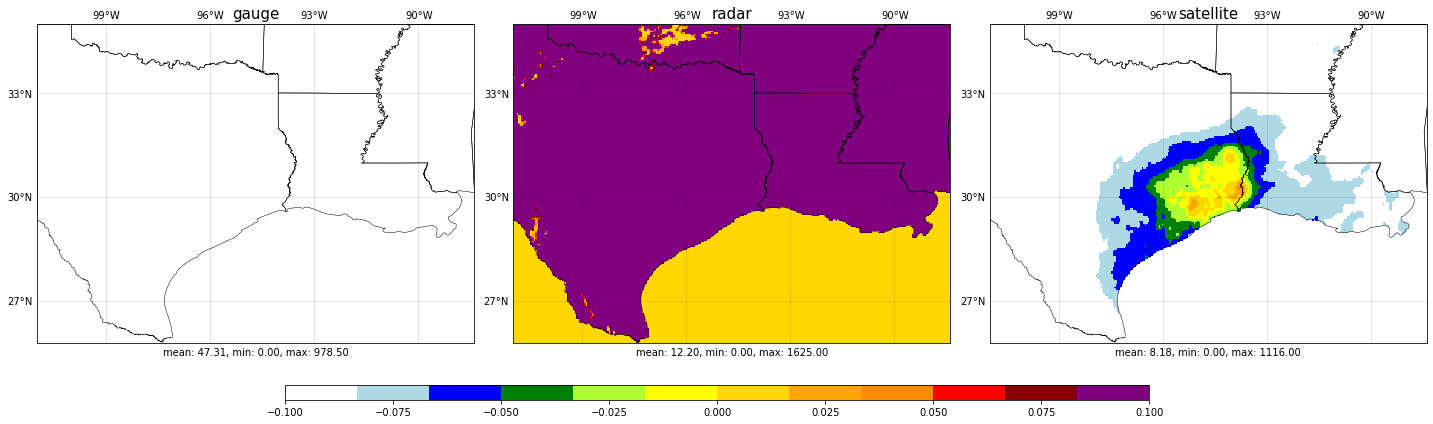

In [12]:
cmap_data= ['white',"lightblue","blue", "green",
                        "greenyellow", "yellow","gold","orange", "darkorange",
                        "red", "darkred", "purple"]
fig= plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge",fontsize=15)
map_1, avg, mn, mx, _ = plot(gauge_sum, cmap= cmap_data, vmin= .1, vmax= mx_radar)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(1,3,2)
ax.set_title("radar",fontsize=15)
map_2, avg, mn_radar, mx_radar, _ = plot(radar_sum, cmap= cmap_data, vmin= .1, vmax= mx_radar)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn_radar, mx_radar))

ax = fig.add_subplot(1,3,3)
ax.set_title("satellite",fontsize=15)
map_3, avg, mn, mx, _ = plot(satellite_sum, cmap= cmap_data, vmin= .1, vmax= mx_radar)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

cbar= fig.add_axes((0.2,0.2,.6,.02))
# cbar.ax.text(range(0.2,0.6,0.4/len(cmap_data)),.1 / 8.0, range(0,mx_radar,mx_radar/len(cmap_data)), ha='center', va='center')

# fig.tight_layout()
fig.colorbar( orientation='horizontal', mappable=map_2, cax= cbar, shrink=0.5, fraction=0.5)
fig.tight_layout()
# fig.savefig('total_harvey.png', dpi=144)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


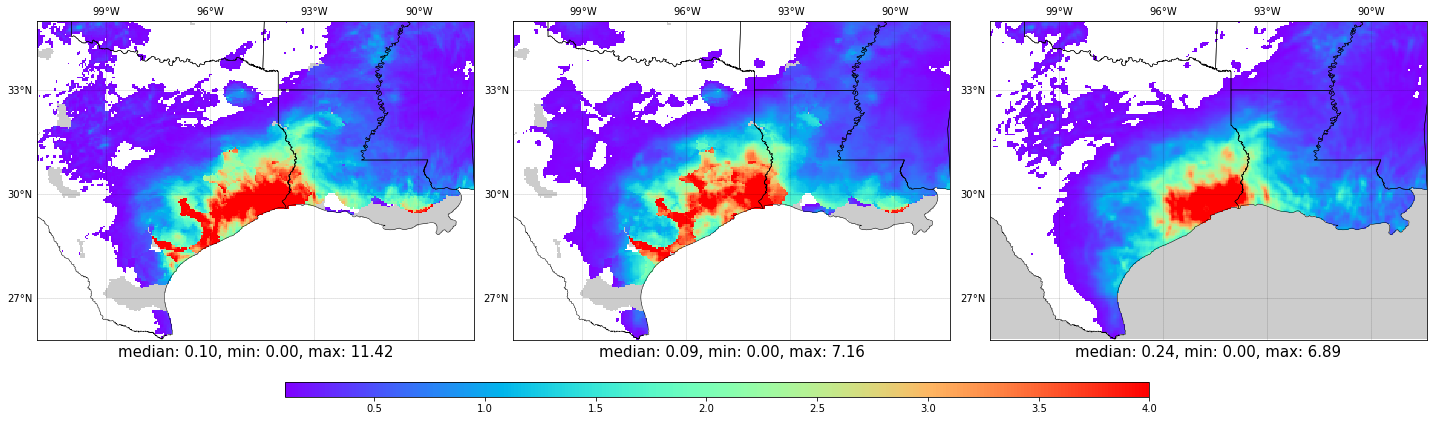

In [31]:
fig= plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,3,1)
# ax.set_title("gauge vs. radar",fontsize=20)
map, avg, mn, mx, _ = plot(gauge_radar_mae, vmin= .1, vmax= 4)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)

ax = fig.add_subplot(1,3,2)
# ax.set_title("gauge vs satellite",fontsize=20)
map, avg, mn, mx, _ = plot(gauge_satellite_mae, vmin= .1, vmax= 4)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)

ax = fig.add_subplot(1,3,3)
# ax.set_title("radar vs. satellite",fontsize=20)
map, avg, mn, mx, _ = plot(radar_satellite_mae, vmin= .1, vmax= 4)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)
cbar= fig.add_axes((0.2,0.2,.6,.02))
cb = plt.colorbar( orientation='horizontal', mappable= map, cax=cbar, fraction=0.70, shrink=0.7)
plt.tight_layout()
# fig.savefig('mae_comparison.png', dpi=144)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


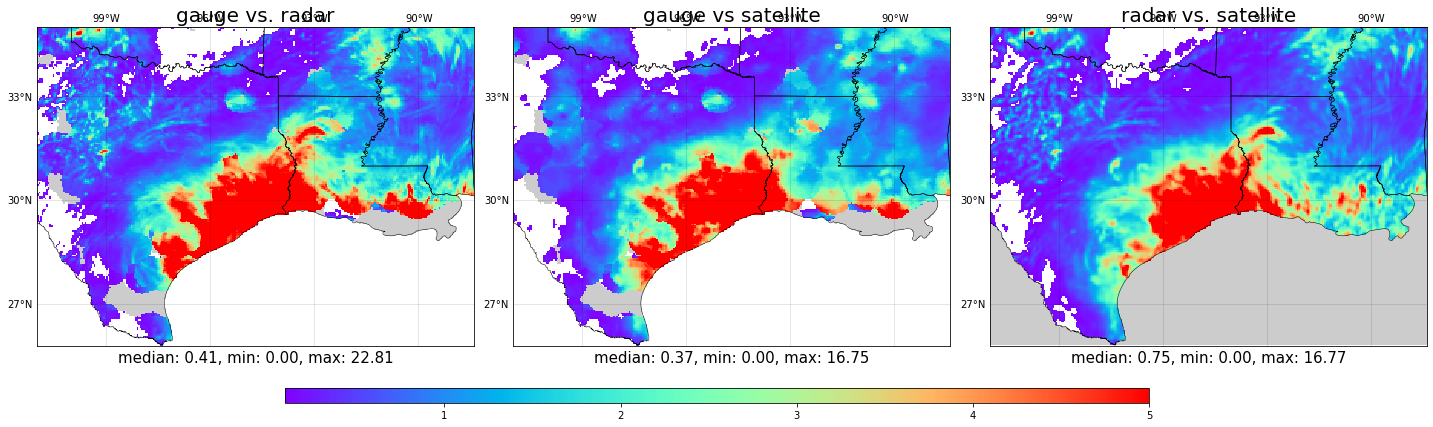

In [33]:
fig= plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,3,1)
ax.set_title("gauge vs. radar",fontsize=20)
map, avg, mn, mx, _ = plot(gauge_radar_rmse, vmin= .1, vmax= 5)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_title("gauge vs satellite",fontsize=20)
map, avg, mn, mx, _ = plot(gauge_satellite_rmse, vmin= .1, vmax= 5)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_title("radar vs. satellite",fontsize=20)
map, avg, mn, mx, _ = plot(radar_satellite_rmse, vmin= .1, vmax= 5)
ax.set_xlabel('median: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx), fontsize=15)
cbar= fig.add_axes((0.2,0.2,.6,.02))
cb = plt.colorbar( orientation='horizontal', mappable= map, cax=cbar, fraction=0.70, shrink=0.7)
plt.tight_layout()
# fig.savefig('rmse_comparison_Harvey.png', dpi=144)

### Plot RMSE error

In [45]:
def plot(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='cyl',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/400mmzone','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('rainbow')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=5)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


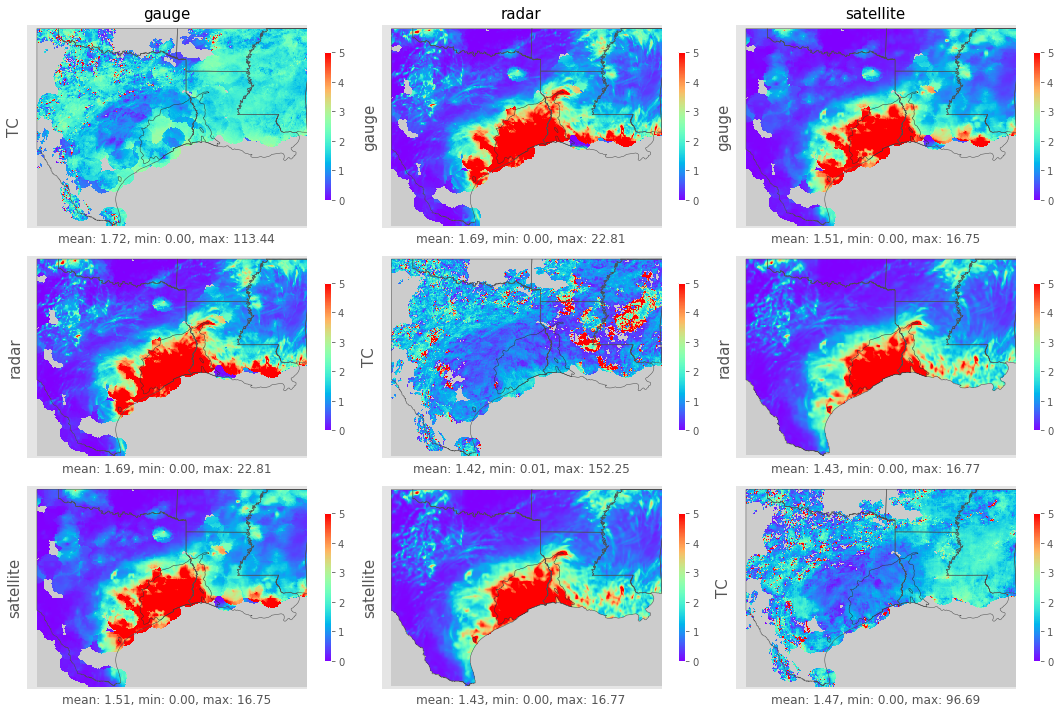

In [93]:
# normalized
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot(gauge_rmse)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot(gauge_radar_rmse)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot(radar_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot(gauge_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot(radar_satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot(satellite_rmse)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)
plt.tight_layout()
plt.show()
# fig.savefig('rmse_comparison.png', dpi=144)

### Plot CC

In [94]:
def plot_cc(src):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='cyl',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/400mmzone','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap('rainbow')
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


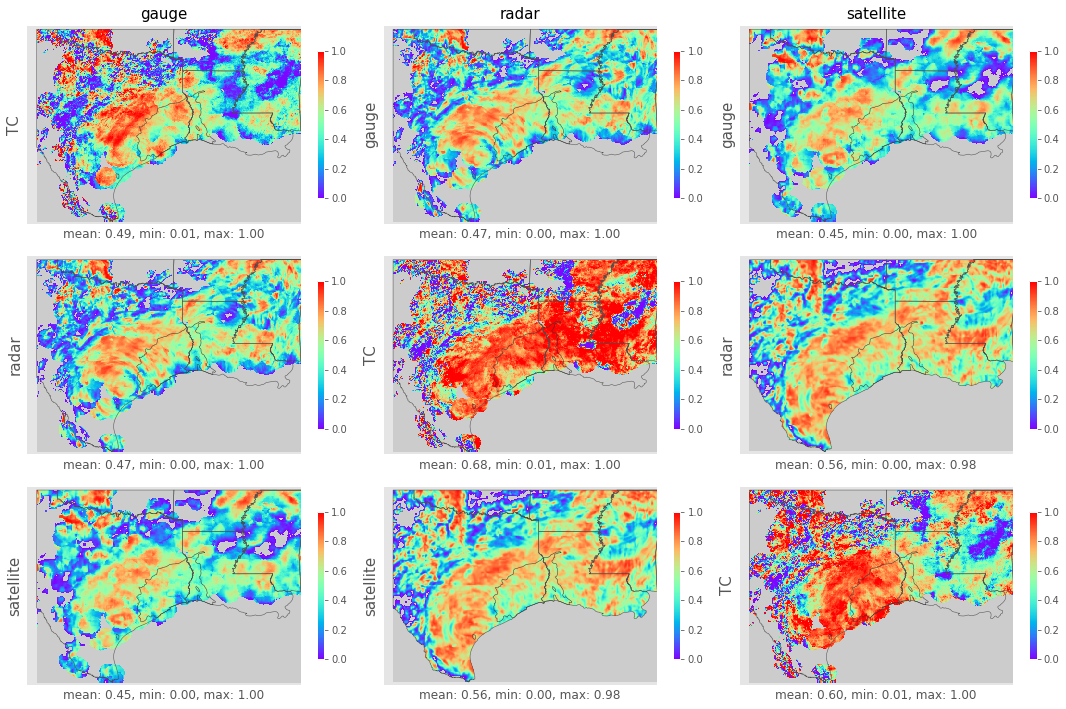

In [95]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_cc)
ax.set_ylabel('TC',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_cc(gauge_radar_cc)
ax.set_ylabel('radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_cc(radar_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('satellite',fontsize=15)
map, avg, mn, mx = plot_cc(gauge_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_cc(radar_satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_cc(satellite_cc)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('TC',fontsize=15)
plt.tight_layout()
plt.show()
# fig.savefig('cc_comparison.png', dpi=144)

### Plot hits

In [13]:
def plot_hit(src, cmap='Reds'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0) | (data>1)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='cyl',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/400mmzone','rain',drawbounds=True, color='0.1')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=1)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


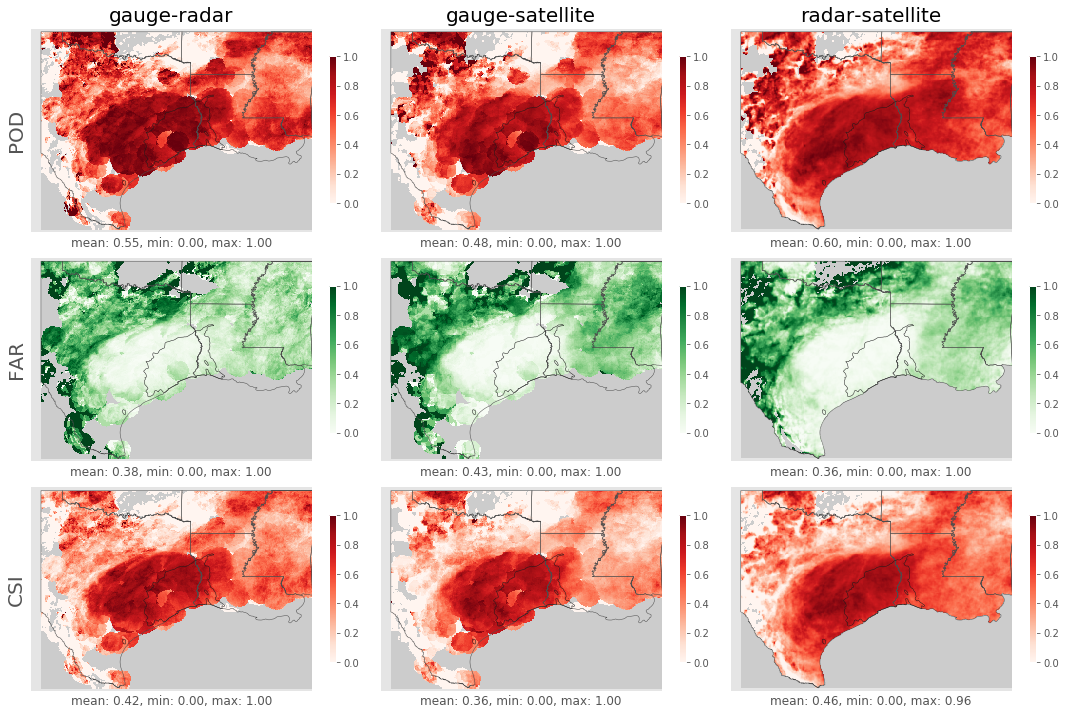

In [14]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge-radar",fontsize=20)
map, avg, mn, mx = plot_hit(gauge_radar_pod)
ax.set_ylabel('POD',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("gauge-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,3)
ax.set_title("radar-satellite",fontsize=20)
map, avg, mn, mx  = plot_hit(radar_satellite_pod)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx  = plot_hit(gauge_radar_far, 'Greens')
ax.set_ylabel('FAR',fontsize=20)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx  = plot_hit(gauge_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx  = plot_hit(radar_satellite_far, 'Greens')
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,7)
ax.set_ylabel('CSI',fontsize=20)
map, avg, mn, mx  = plot_hit(gauge_radar_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,8)

map, avg, mn, mx  = plot_hit(gauge_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax = fig.add_subplot(3,3,9)

map, avg, mn, mx  = plot_hit(radar_satellite_csi)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
plt.tight_layout()
plt.show()
# fig.savefig('hits_comparison.png', dpi=100)

### Rainfall accumulation and bias ratio

In [3]:
def plot_amt(src, cmap='Blues'):
    # Plotting 2070 projected August (8) precip from worldclim
    gdata = gdal.Open(src)
    geo = gdata.GetGeoTransform()
    data = gdata.ReadAsArray().astype(float)
    xres = geo[1]
    yres = geo[5]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-101.5,llcrnrlat=25.7,urcrnrlon=-88.4,urcrnrlat=35.2,
                projection='cyl',lat_1=33,lat_2=45,lon_0=-95)

    # This just plots the shapefile -- it has already been clipped
    m.readshapefile('../harveyimpact/harveyimpact','harveyimpact',drawbounds=True, color='0.3')
    m.readshapefile('../harveyimpact/400mmzone','rain',drawbounds=True, color='0.2')
    xmin = geo[0] + xres * 0.5
    xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
    ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
    ymax = geo[3] - yres * 0.5

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
    x,y = m(x,y)

    cmap = plt.get_cmap(cmap)
    cmap.set_under ('1.0')
    cmap.set_bad('0.8')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=mx)

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, avg, mn, mx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


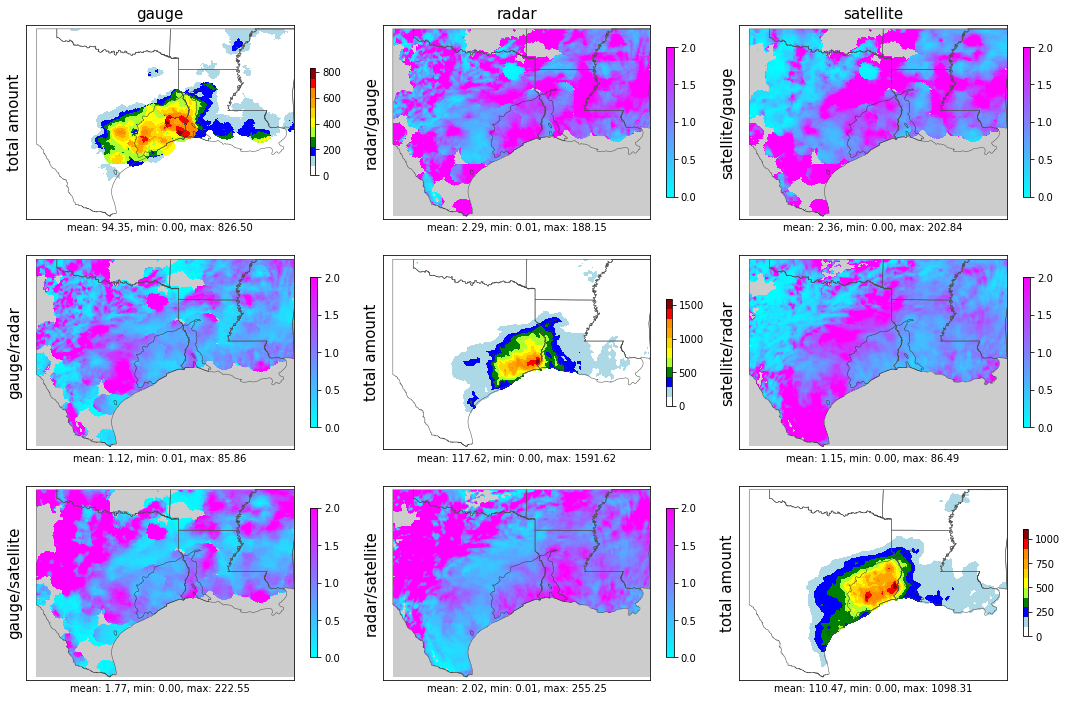

In [44]:
fig= plt.figure(figsize=(15,10))

ax = fig.add_subplot(3,3,1)
ax.set_title("gauge",fontsize=15)
map, avg, mn, mx = plot_amt(gauge_sum)
ax.set_ylabel('total amount',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,2)
ax.set_title("radar",fontsize=15)
map, avg, mn, mx = plot_rat(radar_sum,gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/gauge',fontsize=15)

ax = fig.add_subplot(3,3,3)
ax.set_title("satellite",fontsize=15)
map, avg, mn, mx = plot_rat(satellite_sum, gauge_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/gauge',fontsize=15)

ax = fig.add_subplot(3,3,4)
map, avg, mn, mx = plot_rat(gauge_sum, radar_sum)
ax.set_ylabel('gauge/radar',fontsize=15)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,5)

map, avg, mn, mx = plot_amt(radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)

ax = fig.add_subplot(3,3,6)

map, avg, mn, mx = plot_rat(satellite_sum, radar_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('satellite/radar',fontsize=15)

ax = fig.add_subplot(3,3,7)
ax.set_ylabel('gauge/satellite',fontsize=15)
map, avg, mn, mx = plot_rat(gauge_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))

ax = fig.add_subplot(3,3,8)

map, avg, mn, mx = plot_rat(radar_sum, satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('radar/satellite',fontsize=15)

ax = fig.add_subplot(3,3,9)

map, avg, mn, mx = plot_amt(satellite_sum)
ax.set_xlabel('mean: %.2f, min: %.2f, max: %.2f'%(avg, mn, mx))
ax.set_ylabel('total amount',fontsize=15)
plt.tight_layout()
plt.show()
fig.savefig('volume_ratio.png', dpi=100)

## Zonal statistic analysis

In [30]:
import pandas as pd

gauge_cc_zonal= pd.read_csv('../TCresults/TCresultsHarvey/cc_gauge_zonal.csv')
radar_cc_zonal= pd.read_csv('../TCresults/TCresultsHarvey/cc_radar_zonal.csv')
sat_cc_zonal= pd.read_csv('../TCresults/TCresultsHarvey/cc_sat_zonal.csv')
gauge_rmse_zonal= pd.read_csv('../TCresults/TCresultsHarvey/rmse_gauge_zonal.csv')
radar_rmse_zonal= pd.read_csv('../TCresults/TCresultsHarvey/rmse_radar_zonal.csv')
sat_rmse_zonal= pd.read_csv('../TCresults/TCresultsHarvey/rmse_sat_zonal.csv')
# sat_zone=pd.read_csv('TCresults/zonal_stats.csv')

stats_zone= {}
dfs= [gauge_cc_zonal, radar_cc_zonal, sat_cc_zonal, gauge_rmse_zonal, radar_rmse_zonal, sat_rmse_zonal]
keys= ['gauge_cc', 'radar_cc', 'satellite_cc', 'gauge_rmse', 'radar_rmse', 'satellite_rmse']

In [31]:
def data_preprocess(df):
    '''
    Input:
    -------------
    :df - pandas.DataFrame
    '''
    colnames= df.columns
    bin_values= [col.split('_')[-1] for col in colnames if col.startswith('HISTO')]
    zone_counts= [df.loc[[0,1,2,4,5], col].sum(axis=0) for col in colnames if col.startswith('HISTO')]
    non_zone_counts= [df.loc[[3], col].sum(axis=0) for col in colnames if col.startswith('HISTO')]

    bin_values= np.array(bin_values).astype(float)
    mask= np.where(bin_values>=0)[0]
    bin_values= bin_values[mask]
    zone_counts= np.array(zone_counts)[mask]
    non_zone_counts= np.array(non_zone_counts)[mask]
    zone_values= sum([zone_counts[i]*[bin_values[i]] for i in range(len(bin_values))],[])
    non_zone_values= sum([non_zone_counts[i]*[bin_values[i]] for i in range(len(bin_values))],[])

    return (np.array(zone_values), np.array(non_zone_values))

In [32]:
for i, df in enumerate(dfs):
    stats_zone[keys[i]]= data_preprocess(df)

In [17]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [34]:
def removenan(src):
    src= gdal.Open(src).ReadAsArray()
    src= src.reshape(-1,1)
    src= src[~np.isnan(src)]
    
    return src

In [ ]:
# '#D7191C','#2C7BB6','grey'

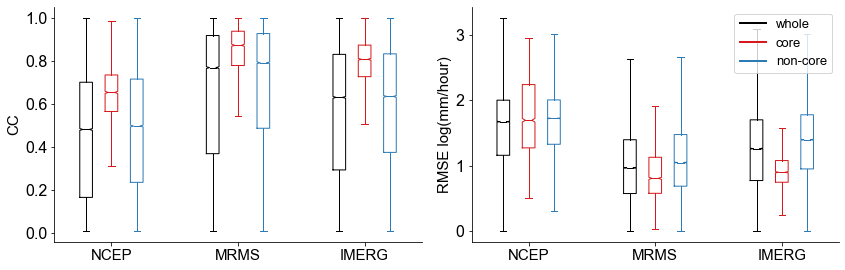

In [20]:
fig, ax= plt.subplots(1,2,figsize=(12,4))
bxl= ax[0].boxplot([removenan(gauge_cc), removenan(radar_cc), removenan(satellite_cc)],
              positions= np.array(range(3))*2-0.4, widths= .2,showfliers=False, notch=True,
                 )
bxm= ax[0].boxplot([stats_zone['gauge_cc'][0], stats_zone['radar_cc'][0], stats_zone['satellite_cc'][0]],
              positions= np.array(range(3))*2, widths= .2,showfliers=False, notch=True,
              )
bxr= ax[0].boxplot([stats_zone['gauge_cc'][1], stats_zone['radar_cc'][1], stats_zone['satellite_cc'][1]],
              positions= np.array(range(3))*2+0.4, widths= .2,showfliers=False, notch=True,
                  )

set_box_color(bxl, 'black')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
# ax[0].plot([], c='black', label='whole')
# ax[0].plot([], c='#D7191C', label='core')
# ax[0].plot([], c='#2C7BB6', label='non-core')
# ax[0].legend(loc='lower right')
ax[0].set_xticks(range(0, 3 * 2, 2))
ax[0].set_xticklabels(['NCEP', 'MRMS', 'IMERG'], fontsize=15)
ax[0].set_ylabel('CC', fontsize=15)
# fig.savefig('cc_zone.png', dpi=100)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

bxl= ax[1].boxplot([removenan(gauge_rmse), removenan(radar_rmse), removenan(satellite_rmse)],
              positions= np.array(range(3))*2-0.4, widths= .2,showfliers=False, notch=True,
                  )
bxm= ax[1].boxplot([(stats_zone['gauge_rmse'][0]), (stats_zone['radar_rmse'][0]), (stats_zone['satellite_rmse'][0])],
              positions= np.array(range(3))*2, widths= .2,showfliers=False, notch=True,
                  )
bxr= ax[1].boxplot([(stats_zone['gauge_rmse'][1]), (stats_zone['radar_rmse'][1]), (stats_zone['satellite_rmse'][1])],
              positions= np.array(range(3))*2+0.4, widths= .2,showfliers=False, notch=True,
                 )

set_box_color(bxl, 'black')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[1].plot([], c='black', label='whole')
ax[1].plot([], c='#D7191C', label='core')
ax[1].plot([], c='#2C7BB6', label='non-core')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('RMSE log(mm/hour)',fontsize=15)
ax[1].set_xticks(range(0, 3 * 2, 2))
ax[1].set_xticklabels(['NCEP', 'MRMS', 'IMERG'], fontsize=15)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.tight_layout()
fig.savefig('box_plot_stats_zone.png',dpi=300)

In [37]:
10**0.52

3.311311214825911

In [22]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# cumulative plots
# gauge_cum= stats_zone['gauge_rmse'][0].cumsum()/stats_zone['gauge_rmse'][0].sum()
# radar_cum= stats_zone['radar_rmse'][0].cumsum()/stats_zone['radar_rmse'][0].sum()
# sat_cum= stats_zone['sat_rmse'][0].cumsum()/stats_zone['sat_rmse'][0].sum()
def hist(x):
    value, base= np.histogram(x, bins=100)
    
    return value, base


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


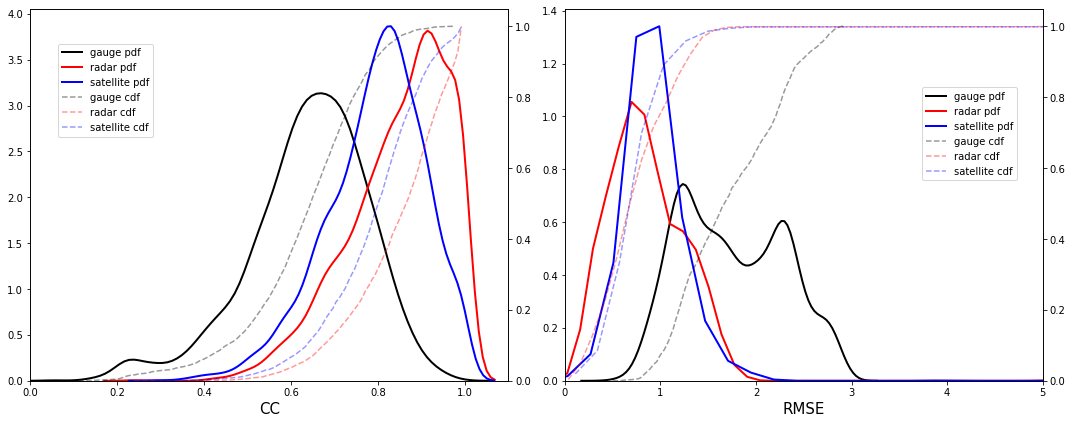

In [49]:
# plt.style.use('ggplot')
fig= plt.figure(figsize=(15,6))
# fig.grid(False)
gauge_value, gauge_base= hist(stats_zone['gauge_cc'][0])
radar_value, radar_base= hist(stats_zone['radar_cc'][0])
sat_value, sat_base= hist(stats_zone['satellite_cc'][0])

gauge_cum= np.cumsum(gauge_value)/gauge_value.sum()
radar_cum= np.cumsum(radar_value)/radar_value.sum()
sat_cum= np.cumsum(sat_value)/sat_value.sum()

fig.add_subplot(1,2,1)
ax= sns.distplot(stats_zone['gauge_cc'][0], hist=False, kde=True, 
             bins=100, color = 'black', label='gauge pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

ax= sns.distplot(stats_zone['radar_cc'][0], hist=False, kde=True, 
             bins=100, color = 'red', label='radar pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color':'red'})
ax= sns.distplot(stats_zone['satellite_cc'][0], hist=False, kde=True, 
             bins=100, color = 'blue', label='satellite pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color':'blue'})
ax2 = ax.twinx()
ax2= sns.lineplot(gauge_base[:-1], gauge_cum, label='gauge cdf',color='black', alpha=.4)
ax2= sns.lineplot(radar_base[:-1], radar_cum, label='radar cdf',color='red', alpha=.4)
ax2= sns.lineplot(sat_base[:-1], sat_cum, label='satellite cdf',color='blue', alpha=.4)
ax2.lines[0].set_linestyle('--')
ax2.lines[1].set_linestyle('--')
ax2.lines[2].set_linestyle('--')
ax2.set_ylim([0,1.05])
ax2.set_xlim([0,1.1])
ax.set_xlabel('CC', fontsize=15)
# ax.legend()
# ax2.legend()
ax.get_legend().remove()
ax2.get_legend().remove()
handles_1, labels_1 = ax.get_legend_handles_labels()
handles_2, labels_2 = ax2.get_legend_handles_labels()
handles_1= handles_1+ handles_2
labels_1= labels_1+ labels_2
ax_add= fig.add_axes((.05,0.8,0.1,0.1), facecolor='white', xticks=[], yticks=[], frameon=False)
ax_add.set_facecolor("white")
ax_add.legend(handles_1,labels_1)
gauge_value, gauge_base= hist(stats_zone['gauge_rmse'][0])
radar_value, radar_base= hist(stats_zone['radar_rmse'][0])
sat_value, sat_base= hist(stats_zone['satellite_rmse'][0])

gauge_cum= np.cumsum(gauge_value)/gauge_value.sum()
radar_cum= np.cumsum(radar_value)/radar_value.sum()
sat_cum= np.cumsum(sat_value)/sat_value.sum()

fig.add_subplot(1,2,2)
ax= sns.distplot(stats_zone['gauge_rmse'][0], hist=False, kde=True, 
             bins=100, color = 'black', label='gauge pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

ax= sns.distplot(stats_zone['radar_rmse'][0], hist=False, kde=True, 
             bins=100, color = 'red', label='radar pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color': 'red'})
ax= sns.distplot(stats_zone['satellite_rmse'][0], hist=False, kde=True, 
             bins=100, color = 'blue', label='satellite pdf',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'color':'blue'})
ax2 = ax.twinx()
ax2= sns.lineplot(gauge_base[:-1], gauge_cum, label='gauge cdf',color='black', alpha=.4)
ax2= sns.lineplot(radar_base[:-1], radar_cum, label='radar cdf',color='red', alpha=.4)
ax2= sns.lineplot(sat_base[:-1], sat_cum, label='satellite cdf',color='blue', alpha=.4)
ax2.lines[0].set_linestyle('--')
ax2.lines[1].set_linestyle('--')
ax2.lines[2].set_linestyle('--')
ax2.set_ylim([0,1.05])
ax.set_xlabel('RMSE', fontsize=15)



handles_1, labels_1 = ax.get_legend_handles_labels()
handles_2, labels_2 = ax2.get_legend_handles_labels()
handles_1= handles_1+ handles_2
labels_1= labels_1+ labels_2
ax.get_legend().remove()
ax2.get_legend().remove()
ax2.set_xlim([0,5])
# ax2.set_ylim([0,1.05])
# ax.legend(loc=(4,1.0))
# ax2.legend(loc=(4,0))
ax_add= fig.add_axes((.85,0.7,0.1,0.1), facecolor='white', xticks=[], yticks=[], frameon=False)
ax_add.set_facecolor("white")
ax_add.legend(handles_1,labels_1)
# ax_add= fig.add_axes((1.0,0.69,0.1,0.05), xticks=[], yticks=[])
# ax_add.set_facecolor("white")
# ax_add.legend(handles_2, labels_2)
plt.tight_layout()
plt.grid(False)

# fig.savefig('error_dist_Harvey_core.png', dpi=144)

## Dynamic range plots for hurricane core

In [34]:
np.logspace(np.log10(50), np.log10(1250), 10)

array([  50.        ,   71.49845742,  102.24058826,  146.20088691,
        209.06275774,  298.95329363,  427.49398667,  611.30321202,
        874.14473346, 1250.        ])

In [35]:
def nonzero(gauge, sat, radar):
    mask= (gauge>0) & (radar>400) & (sat>0)
    return gauge[mask], radar[mask], sat[mask]

def make_barplot(gauge, radar, sat, rmse_gauge, rmse_radar, rmse_sat, cc_gauge, cc_radar, cc_sat):
    '''make categories that fall each inside'''
#     x= [400,450,500,550,600,650,700,750,800,850,900,1000,1100,1200,1400]
#     x= np.arange(50, 1250, 50)
    x= np.logspace(np.log10(50), np.log10(1250), 10)
#     print(x)
    gauge_counts= []
    radar_counts= []
    sat_counts= []
    gauge_rmse= []
    radar_rmse= []
    sat_rmse= []
    gauge_cc= []
    radar_cc= []
    sat_cc= []
    for i in range(len(x)-1):
        mask_gauge= (gauge<=x[i+1]) & (gauge>x[i])
        mask_radar= (radar<=x[i+1]) & (radar>x[i])
        mask_sat= (sat<=x[i+1]) & (sat>x[i])
        gauge_counts.append(mask_gauge.sum())
        radar_counts.append(mask_radar.sum())
        sat_counts.append(mask_sat.sum())
#         print(mask_radar.shape, rmse_radar.shape)
        gauge_rmse.append(rmse_gauge[mask_radar])
        radar_rmse.append(rmse_radar[mask_radar])
        sat_rmse.append(rmse_sat[mask_radar])
        gauge_cc.append(cc_gauge[mask_radar])
        radar_cc.append(cc_radar[mask_radar])
        sat_cc.append(cc_sat[mask_radar])
        
    stats= pd.DataFrame()
    stats['left']= x[:-1]
    stats['right']= x[1:]
    stats['gauge_counts']= gauge_counts
    stats['radar_counts']= radar_counts
    stats['sat_counts']= sat_counts
#     stats['gauge_rmse']= gauge_rmse_mean
#     stats['radar_rmse']= radar_rmse_mean
#     stats['sat_rmse']= sat_rmse_mean
#     stats['gauge_cc']= gauge_cc_mean
#     stats['radar_cc']= radar_cc_mean
#     stats['sat_cc']= sat_cc_mean
    
    return stats, gauge_rmse, radar_rmse, sat_rmse, gauge_cc, radar_cc, sat_cc

In [36]:
# read data
# radar_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/zone_sum_radar.tif').ReadAsArray()
# gauge_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/zone_sum_gauge.tif').ReadAsArray()
# sat_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/zone_sum_satellite.tif').ReadAsArray()
# gauge_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/zone_rmse_gauge.tif').ReadAsArray()
# radar_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/zone_rmse_radar.tif').ReadAsArray()
# sat_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/zone_rmse_sat.tif').ReadAsArray()
# gauge_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/zone_cc_gauge.tif').ReadAsArray()
# radar_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/zone_cc_radar.tif').ReadAsArray()
# sat_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/zone_cc_sat.tif').ReadAsArray()

gauge_cone_sum= gdal.Open('../intercomparison/Harvey/gauge_radar_sum_gauge.tif').ReadAsArray()
radar_cone_sum= gdal.Open('../intercomparison/Harvey/satellite_radar_sum_radar.tif').ReadAsArray()
sat_cone_sum= gdal.Open('../intercomparison/Harvey/gauge_satellite_sum_satellite.tif').ReadAsArray()
gauge_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/rmse_gauge_mtc.tif').ReadAsArray()
radar_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/rmse_radar_mtc.tif').ReadAsArray()
sat_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/rmse_sat_mtc.tif').ReadAsArray()
gauge_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/cc_gauge_mtc.tif').ReadAsArray()
radar_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/cc_radar_mtc.tif').ReadAsArray()
sat_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/cc_sat_mtc.tif').ReadAsArray()


In [37]:
# gauge_cone_sum, radar_cone_sum, sat_cone_sum= nonzero(gauge_cone_sum, radar_cone_sum, sat_cone_sum)
stats, gauge_rmse, radar_rmse, sat_rmse, gauge_cc, radar_cc, sat_cc= make_barplot(gauge_cone_sum,radar_cone_sum,sat_cone_sum,gauge_cone_rmse,radar_cone_rmse,sat_cone_rmse,gauge_cone_cc,
                   radar_cone_cc,sat_cone_cc)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


#a00000

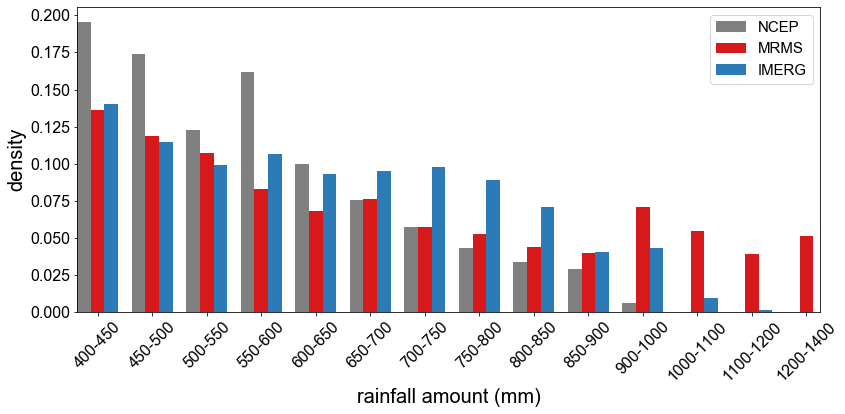

In [48]:
fig= plt.figure(figsize=(12,6))
barWidth= 0.25
r1 = np.arange(len(stats))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, (stats.gauge_counts)/(stats.gauge_counts).sum(), width=barWidth, label='NCEP',  color='grey')
plt.bar(r2, (stats.radar_counts)/(stats.radar_counts).sum(), width=barWidth, label='MRMS',  color='#D7191C')
plt.bar(r3, (stats.sat_counts)/(stats.sat_counts).sum(), width=barWidth, label='IMERG',  color='#2C7BB6')
# plt.plot(r1, stats.gauge_rmse/stats.gauge_rmse.sum(), 'o--', color='C0', label='gauge rmse')
# plt.plot(r2, stats.radar_rmse/stats.radar_rmse.sum(), 'o--', color='C1', label='radar rmse')
# plt.plot(r3, stats.sat_rmse/stats.sat_rmse.sum(), 'o--', color='C2', label='satellite rmse')
# plt.plot(r1, stats.gauge_cc/stats.gauge_cc.sum(), '-.',marker='v', color='C0', label='gauge cc')
# plt.plot(r2, stats.radar_cc/stats.radar_cc.sum(), '-.',marker='v', color='C1', label='radar cc')
# plt.plot(r3, stats.sat_cc/stats.sat_cc.sum(), '-.',marker='v', color='C2', label='satellite cc')
plt.xticks([r + barWidth for r in range(len(stats))], stats.left.astype(str)+'-'+stats.right.astype(str), rotation=45)
plt.ylabel('density', fontsize=20)
plt.xlabel('rainfall amount (mm)', fontsize=20)
plt.xlim([r1.min()-0.125,max(r3)])
plt.legend(fontsize=15)
fig.savefig('dynamicRangeBar.png', dpi=300)

In [38]:
def remove_nan(l):
    arr= np.array(l)
    mask= np.isnan(arr)
    
    return l[~mask]

In [39]:
components_per= len(stats)
for i in range(components_per):
    
    gauge_rmse[i]= remove_nan(gauge_rmse[i])
    gauge_cc[i]= remove_nan(gauge_cc[i])
    radar_rmse[i]= remove_nan(radar_rmse[i])
    radar_cc[i]= remove_nan(radar_cc[i])
    sat_rmse[i]= remove_nan(sat_rmse[i])
    sat_cc[i]= remove_nan(sat_cc[i])

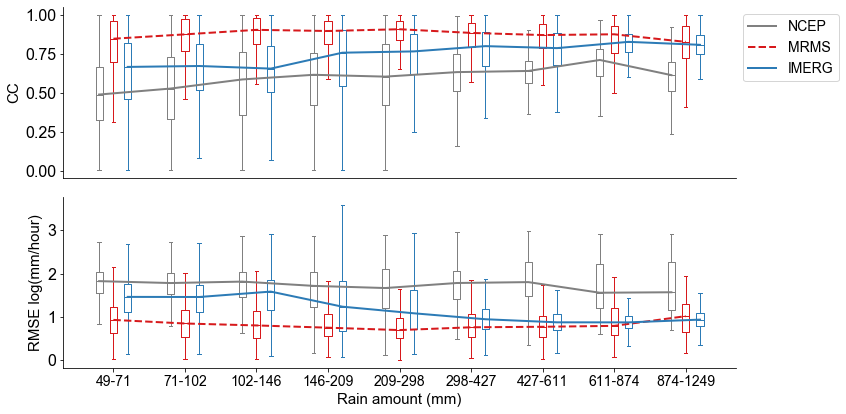

In [51]:
# box plot for each range as stats
boxWidth= 0.2
fig, ax= plt.subplots(2,1, figsize=(12,6))
r1 = np.arange(components_per)
r2 = [x + boxWidth for x in r1]
r3 = [x + boxWidth for x in r2]
bxl= ax[1].boxplot(gauge_rmse, positions= r1, widths=0.1, showfliers=False)
bxm= ax[1].boxplot(radar_rmse, positions= r2, widths=0.1, showfliers=False)
bxr= ax[1].boxplot(sat_rmse, positions= r3, widths=0.1, showfliers=False)
ax[1].plot(range(len(gauge_rmse)), [np.nanmedian(np.array(gauge_rmse[i])) for i in range(len(gauge_rmse))], color= 'grey', linewidth=2, label='NCEP')
ax[1].plot(np.arange(len(radar_rmse))+boxWidth, [np.nanmedian(np.array(radar_rmse[i])) for i in range(len(radar_rmse))], color= '#D7191C', linewidth=2, linestyle= 'dashed', label='MRMS')
ax[1].plot(np.arange(len(sat_rmse))+2*boxWidth, [np.nanmedian(np.array(sat_rmse[i])) for i in range(len(sat_rmse))], color= '#2C7BB6', linewidth=2, label='IMERG')
# ax[1].plot([],c= 'grey', label='NCEP')
# ax[1].plot([],c= '#D7191C', label='MRMS')
# ax[1].plot([],c= '#2C7BB6', label='IMERG')
set_box_color(bxl, 'grey')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[1].set_xticks([r + boxWidth for r in range(len(r1))])
ax[1].set_xticklabels(['%d-%d'%(stats.loc[i, 'left'].astype(int), stats.loc[i, 'right'].astype(int)) for i in stats.index], fontsize=14)
ax[1].set_xlabel('Rain amount (mm)', fontsize=15, weight='normal')
ax[1].set_ylabel('RMSE log(mm/hour)', fontsize=15, weight='normal')
# ax[1].legend()


bxl= ax[0].boxplot(gauge_cc, positions= r1, widths=0.1, showfliers=False)
bxm= ax[0].boxplot(radar_cc, positions= r2, widths=0.1, showfliers=False)
bxr= ax[0].boxplot(sat_cc, positions= r3, widths=0.1, showfliers=False)
ax[0].plot(range(len(gauge_cc)), [np.nanmedian(np.array(gauge_cc[i])) for i in range(len(gauge_cc))], color= 'grey', linewidth=2, label='NCEP')
ax[0].plot(np.arange(len(radar_cc))+boxWidth, [np.nanmedian(np.array(radar_cc[i])) for i in range(len(radar_cc))], color= '#D7191C', linewidth=2, linestyle= 'dashed', label='MRMS')
ax[0].plot(np.arange(len(sat_cc))+2*boxWidth, [np.nanmedian(np.array(sat_cc[i])) for i in range(len(sat_cc))], color= '#2C7BB6', linewidth=2, label='IMERG')
# ax[0].plot([],c= 'grey', label='NCEP')
# ax[0].plot([],c= '#D7191C', label='MRMS')
# ax[0].plot([],c= '#2C7BB6', label='IMERG')
set_box_color(bxl, 'grey')
set_box_color(bxm, '#D7191C')
set_box_color(bxr, '#2C7BB6')
ax[0].set_xticks([])
ax[0].set_ylabel('CC', fontsize=15, weight='normal')
# ax[0].set_xticklabels(stats.left.astype(str), fontsize=10)
ax[0].legend(bbox_to_anchor= (1,1))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tight_layout()
plt.show();
fig.savefig('dynamic Range_same_rainRef.png', dpi=500);

## Dynamic range plots for hurricane core

In [96]:
def nonzero(gauge, sat, radar):
    mask= (gauge>0) & (radar>400) & (sat>0)
    return gauge[mask], radar[mask], sat[mask]

def make_barplot_non_core(gauge, radar, sat, rmse_gauge, rmse_radar, rmse_sat, cc_gauge, cc_radar, cc_sat):
    '''make categories that fall each inside'''
    x= np.arange(50,450,50)
    gauge_counts= []
    radar_counts= []
    sat_counts= []
    gauge_rmse_mean= []
    radar_rmse_mean= []
    sat_rmse_mean= []
    gauge_cc_mean= []
    radar_cc_mean= []
    sat_cc_mean= []
    for i in range(len(x)-1):
        mask_gauge= (gauge<x[i+1]) & (gauge>x[i])
        mask_radar= (radar<x[i+1]) & (radar>x[i])
        mask_sat= (sat<x[i+1]) & (sat>x[i])
        gauge_counts.append(mask_gauge.sum())
        radar_counts.append(mask_radar.sum())
        sat_counts.append(mask_sat.sum())
        gauge_rmse_mean.append(rmse_gauge[mask_gauge])
        radar_rmse_mean.append(rmse_radar[mask_radar])
        sat_rmse_mean.append(rmse_sat[mask_sat])
        gauge_cc_mean.append(cc_gauge[mask_gauge])
        radar_cc_mean.append(cc_radar[mask_radar])
        sat_cc_mean.append(cc_sat[mask_sat])
        
    stats= pd.DataFrame()
    stats['left']= x[:-1]
    stats['right']= x[1:]
    stats['gauge_counts']= gauge_counts
    stats['radar_counts']= radar_counts
    stats['sat_counts']= sat_counts

    
    return stats,gauge_rmse_mean,radar_rmse_mean,sat_rmse_mean,gauge_cc_mean,radar_cc_mean,sat_cc_mean

In [26]:
# read data
radar_non_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/none_core_radar_satellite_sum_radar.tif').ReadAsArray()
gauge_non_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/none_core_gauge_satellite_sum_gauge.tif').ReadAsArray()
sat_non_cone_sum= gdal.Open('../TCresults/TCresultsHarvey/none_core_gauge_satellite_sum_satellite.tif').ReadAsArray()
gauge_non_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/none_core_rmse_gauge.tif').ReadAsArray()
radar_non_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/none_core_rmse_radar.tif').ReadAsArray()
sat_non_cone_rmse= gdal.Open('../TCresults/TCresultsHarvey/none_core_rmse_sat.tif').ReadAsArray()
gauge_non_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/none_core_cc_gauge.tif').ReadAsArray()
radar_non_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/none_core_cc_radar.tif').ReadAsArray()
sat_non_cone_cc= gdal.Open('../TCresults/TCresultsHarvey/none_core_cc_sat.tif').ReadAsArray()

In [101]:
# gauge_cone_sum, radar_cone_sum, sat_cone_sum= nonzero(gauge_cone_sum, radar_cone_sum, sat_cone_sum)
stats_non_core, gauge_rmse_non_core, radar_rmse_non_core, sat_rmse_non_core, gauge_cc_non_core, radar_cc_non_core, sat_cc_non_core\
= make_barplot_non_core(gauge_non_cone_sum,radar_non_cone_sum,sat_non_cone_sum,gauge_non_cone_rmse,
                                      radar_non_cone_rmse,sat_non_cone_rmse,gauge_non_cone_cc,radar_non_cone_cc,sat_non_cone_cc)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [102]:
for i in range(len(gauge_rmse_non_core)):
    
    gauge_rmse_non_core[i]= remove_nan(gauge_rmse_non_core[i])
    gauge_cc_non_core[i]= remove_nan(gauge_cc_non_core[i])
    radar_rmse_non_core[i]= remove_nan(radar_rmse_non_core[i])
    radar_cc_non_core[i]= remove_nan(radar_cc_non_core[i])
    sat_rmse_non_core[i]= remove_nan(sat_rmse_non_core[i])
    sat_cc_non_core[i]= remove_nan(sat_cc_non_core[i])

## Wrap up graphs

#### rainfall amount distribution plot

In [ ]:
fig, ax= plt.subplots(2,1,figsize=(10,10))
ax[0].boxplot([])

In [56]:
boxWidth= 0.25
components_per= len(stats)//2
r1 = np.arange(components_per)
r2 = [x + boxWidth for x in r1]
r3 = [x + boxWidth for x in r2]
fig, ax= plt.subplots(3,1,figsize=(20,18))
bxl= ax[1].boxplot(gauge_cc[:components_per], positions= r1, widths=0.1, showfliers=False)
bxm= ax[1].boxplot(radar_cc[:components_per], positions= r2, widths=0.1, showfliers=False)
bxr= ax[1].boxplot(sat_cc[:components_per], positions= r3, widths=0.1, showfliers=False)
ax[1].plot([],c= 'black', label='gauge')
ax[1].plot([],c= 'C0', label='radar')
ax[1].plot([],c= 'C1', label='satellite')
set_box_color(bxl, 'black')
set_box_color(bxm, 'C0')
set_box_color(bxr, 'C1')
ax[1].set_xticks([r + boxWidth for r in range(len(r1))])
ax[1].set_xticklabels(stats.left.astype(str)[:components_per]+'-'+stats.right.astype(str)[:components_per])
ax[1].legend()

bxl= ax[2].boxplot(gauge_cc[components_per:], positions= r1, widths=0.1, showfliers=False)
bxm= ax[2].boxplot(radar_cc[components_per:], positions= r2, widths=0.1, showfliers=False)
bxr= ax[2].boxplot(sat_cc[components_per:], positions= r3, widths=0.1, showfliers=False)
ax[2].plot([],c= 'black', label='gauge')
ax[2].plot([],c= 'C0', label='radar')
ax[2].plot([],c= 'C1', label='satellite')
set_box_color(bxl, 'black')
set_box_color(bxm, 'C0')
set_box_color(bxr, 'C1')
ax[2].set_xticks([r + boxWidth for r in range(len(r1))])
ax[2].set_xticklabels(stats.left.astype(str)[components_per:]+'-'+stats.right.astype(str)[components_per:])
ax[2].legend()

r1 = np.arange(len(stats_non_core))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
bxl= ax[0].boxplot(gauge_cc_non_core, positions= r1, widths=0.1, showfliers=False)
bxm= ax[0].boxplot(radar_cc_non_core, positions= r2, widths=0.1, showfliers=False)
bxr= ax[0].boxplot(sat_cc_non_core, positions= r3, widths=0.1, showfliers=False)
ax[0].plot([],c= 'black', label='gauge')
ax[0].plot([],c= 'C0', label='radar')
ax[0].plot([],c= 'C1', label='satellite')
set_box_color(bxl, 'black')
set_box_color(bxm, 'C0')
set_box_color(bxr, 'C1')
ax[0].set_xticks([r + boxWidth for r in range(len(r1))])
ax[0].set_xticklabels(stats_non_core.left.astype(str)+'-'+stats_non_core.right.astype(str))
ax[0].legend()
plt.tight_layout()
fig.savefig('wraped_boxplot_cc.png', dpi=100)

NameError: name 'stats' is not defined

In [312]:
rmse_gauge= []
cc_gauge= []
rmse_radar= []
cc_radar= []
rmse_sat= []
cc_sat= []
for i in range(len(gauge_rmse)+len(gauge_rmse_non_core)):
    if i<len(gauge_rmse_non_core):
        rmse_gauge.append(np.nanmean(gauge_rmse_non_core[i]))
        cc_gauge.append(np.nanmean(gauge_cc_non_core[i]))
        rmse_radar.append(np.nanmean(radar_rmse_non_core[i]))
        cc_radar.append(np.nanmean(radar_cc_non_core[i]))
        rmse_sat.append(np.nanmean(sat_rmse_non_core[i]))
        cc_sat.append(np.nanmean(sat_cc_non_core[i]))
    elif i>=len(gauge_rmse_non_core):
        rmse_gauge.append(np.nanmean(gauge_rmse[i-len(gauge_rmse_non_core)]))
        cc_gauge.append(np.nanmean(gauge_cc[i-len(gauge_rmse_non_core)]))
        rmse_radar.append(np.nanmean(radar_rmse[i-len(gauge_rmse_non_core)]))
        cc_radar.append(np.nanmean(radar_cc[i-len(gauge_rmse_non_core)]))
        rmse_sat.append(np.nanmean(sat_rmse[i-len(gauge_rmse_non_core)]))
        cc_sat.append(np.nanmean(sat_cc[i-len(gauge_rmse_non_core)]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


### Validation of TC

In [5]:
import geopandas as gpd
import pandas as pd
import affine
sys.path.append('../')
from dataprocess import PixelTS
# read county-based gauge data
gauge_meta= gpd.read_file('../shp/selectedPoints.shp')
# gauge_ts= pd.read_csv('../rainguageHarri/Harvey_RainGauge.csv')
import glob

In [44]:
corePoly= '../../harveyimpact/400mmPolygon.shp'

In [7]:
radar_rmse= gdal.Open(radar_rmse)

In [8]:
gauge_meta.sort_values('id', inplace=True)
gauge_meta.set_index('id', inplace=True)

In [9]:
geotrans= radar_rmse.GetGeoTransform()
forward_transform =  affine.Affine.from_gdal(*geotrans)
results= [~forward_transform * np.array(gauge_meta.geometry.iloc[i]) for i in range(len(gauge_meta))]
ids= [gauge_meta.index[i] for i in range(len(gauge_meta))]

In [12]:
gauge_meta

place                                      geometry
id                                                                  
1              Houston  POINT (-95.36510486018648 29.75444573901465)
2                 None  POINT (-93.79061851172396 30.26718411119861)
3         maximum rain  POINT (-94.25809587217051 29.91201564580559)
4   maximum rmse gauge   POINT (-94.04063332223717 29.7345485186418)
5            radar_max   POINT (-94.0326449657511 29.58192660830471)

In [10]:
results= [(ids[i], int(results[i][0]+0.5), int(results[i][1]+0.5)) for i in range(len(results))]

In [20]:
MRMSpath= '../../cleaned/Harvey_gauge/*.tif'
NCEPpath= '../../cleaned/Harvey_mrms/*.tif'
IMERGpath= '../../cleaned/Harvey_GPM/*.tif'

In [48]:
def mask_raster(raster_name, shapes_name, crop=False):
    raster= rasterio.open(raster_name)
    with fiona.open(shapes_name, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]
    
    out_img, out_transform = mask(raster, shapes, crop=False, nodata=np.nan)
    
    return out_img.squeeze()

AttributeError: 'AxesImage' object has no attribute 'shape'

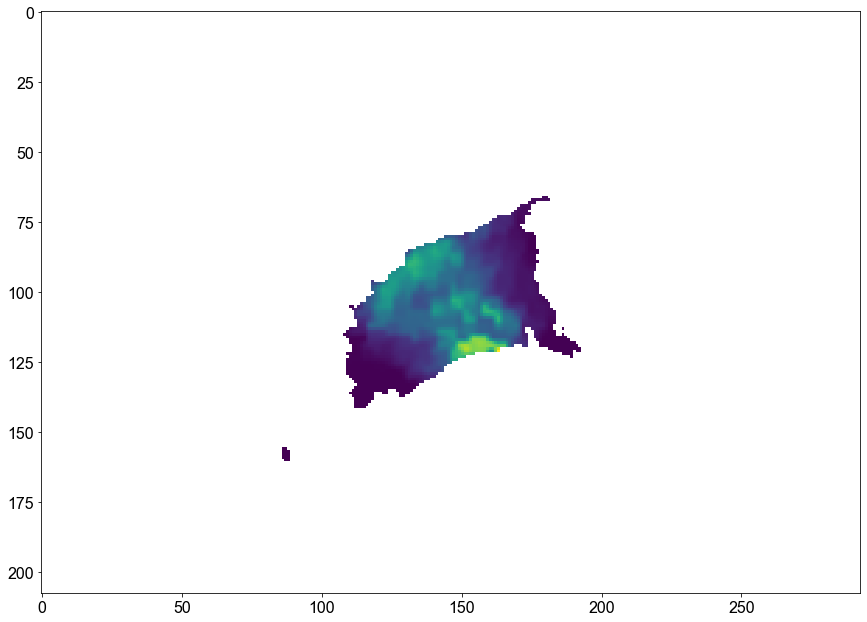

In [51]:
plt.imshow(mask_raster(f, corePoly, crop=True)).shape

In [52]:
meanMRMS= {}

for f in glob.glob(MRMSpath):
    mrms= np.array(mask_raster(f, corePoly, crop=True))
    time= f.split('/')[-1].split('.')[0][5:]
    meanMRMS[time]= np.nansum(mrms)/(mrms>0).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [53]:
meanNCEP= {}

for f in glob.glob(NCEPpath):
    ncep= np.array(mask_raster(f, corePoly, crop=True))
    time= f.split('/')[-1].split('.')[1][3:]
    meanNCEP[time]= np.nansum(ncep)/(ncep>0).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [54]:
meanIMERG= {}

for f in glob.glob(IMERGpath):
    imerg= np.array(mask_raster(f, corePoly, crop=True))
    time= f.split('/')[-1].split('.')[0][6:]
    meanIMERG[time]= np.nansum(imerg)/(imerg>0).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [55]:
dfIMERG= pd.DataFrame.from_dict(meanIMERG,orient='index')
dfIMERG.index= pd.to_datetime(dfIMERG.index, format='%Y%m%dS%H%M%S')
dfIMERG.rename(columns= {0: 'IMERG'}, inplace=True)
dfIMERG.sort_index(inplace=True)
# dfIMERG

In [56]:
dfMRMS= pd.DataFrame.from_dict(meanMRMS,orient='index')
dfMRMS.index= pd.to_datetime(dfMRMS.index, format= '%Y%m%d%H')
dfMRMS.rename(columns= {0: 'MRMS'}, inplace=True)
dfMRMS.sort_index(inplace=True)

In [57]:
dfNCEP= pd.DataFrame.from_dict(meanNCEP, orient='index')
dfNCEP.index= pd.to_datetime(dfNCEP.index, format='%Y%m%d-%H%M%S')
dfNCEP.rename(columns= {0: 'NCEP'}, inplace=True)
dfNCEP.sort_index(inplace=True)

In [58]:
meants= pd.concat([dfMRMS, dfIMERG, dfNCEP], axis=1)

1
2
3
4


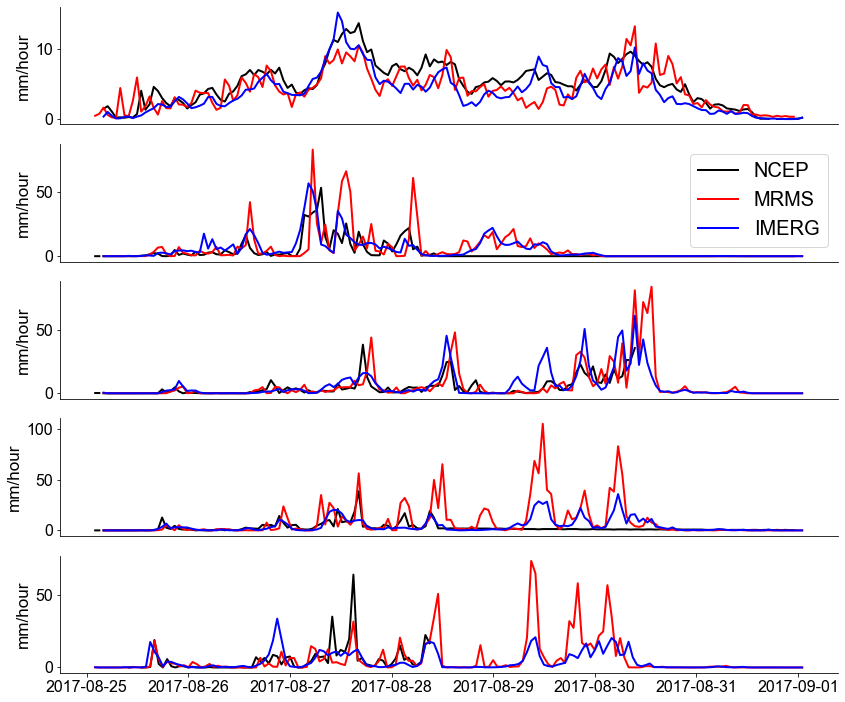

In [83]:
fig, ax= plt.subplots(5,1, figsize=(12, 10))
ax[0].plot(meants.index, meants.NCEP, color='black', label='NCEP')
ax[0].plot(meants.index, meants.MRMS, color='red', label='MRMS')
ax[0].plot(meants.index, meants.IMERG, color='blue', label='IMERG')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_xticks([''])
ax[0].set_ylabel('mm/hour')
for i, point in enumerate(results[:-1]):
    site_id, x, y= point[0], point[1], point[2]
    ts= PixelTS().singlePixel(y,x)
    ts['radar'][ts['radar']<0]= np.nan
    ts['gauge'][ts['gauge']<0]= np.nan
    ts['satellite'][ts['satellite']<0]= np.nan
    ts.index= pd.to_datetime(ts.index, format='%Y%m%d%H')
    ax[i+1].plot(ts.index, ts.gauge, color='black', label='NCEP')
    ax[i+1].plot(ts.index, ts.radar, color='red', label='MRMS')
    ax[i+1].plot(ts.index, ts.satellite, color='blue', label='IMERG')
    ax[i+1].spines['right'].set_visible(False)
    ax[i+1].spines['top'].set_visible(False)
    ax[i+1].set_ylabel('mm/hour')
    if i<3:
        ax[i+1].set_xticks([''])
    ax[1].legend(fontsize=20)
    print(site_id)
    
# ax[-1].set_xticks(np.arange(len(ts.index)));
# ax[-1].set_xticklabels(ts.index.strftime('%Y-%m-%d'));
#     ax[i].set_ylabel('rain rate (mm/hour)')
#     ax[i].('Site ID: %d, (%.2f, %.2f)'%(site_id, np.array(gauge_meta.geometry[i])[0], np.array(gauge_meta.geometry[i])[1]), fontsize=10)
plt.tight_layout()
fig.savefig('ts_points.png', dpi=300)

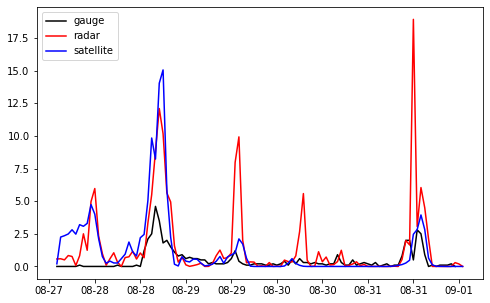

In [185]:
from matplotlib.dates import DateFormatter
fig, ax= plt.subplots(1,1,figsize=(8,5))
ax.plot(ts.index[60:-2].values, ts.gauge[60:-2].values, color='black', label='gauge')
ax.plot(ts.index[60:-2].values, ts.radar[60:-2].values, color='red', label='radar')
ax.plot(ts.index[60:-2].values, ts.satellite[60:-2].values, color='blue', label='satellite')
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax.legend()
# ax.set_xlim([30,60])
fig.savefig('anomalies_radar.png', dpi=144)

## Conditional Metrics

In [54]:
core_shp= '../../harveyimpact/400mmzone.shp'

In [55]:
import geopandas as gpd
core= gpd.read_file(core_shp)

In [152]:
import affine

In [ ]:
geotrans= radar_rmse.GetGeoTransform()
forward_transform =  affine.Affine.from_gdal(*geotrans)
results= [~forward_transform * np.array(gauge_meta.geometry.iloc[i]) for i in range(len(gauge_meta))]
ids= [gauge_meta.index[i] for i in range(len(gauge_meta))]

In [89]:
raster= gdal.Open(radar_sum)
geotrans= raster.GetGeoTransform()
forward_transform =  affine.Affine.from_gdal(*geotrans)
coords= [~forward_transform * (x, y) for x,y  in zip([core.drop([0,1,3], axis=0).geometry.bounds.minx.values, core.drop([0,1,3], axis=0).geometry.bounds.maxx.values], [core.drop([0,1,3], axis=0).geometry.bounds.maxy.values,
                   core.drop([0,1,3], axis=0).geometry.bounds.miny.values])]

In [92]:
coords

[(array([107.89506177]), array([66.38059054])),
 (array([193.19620261]), array([142.21812561]))]

In [80]:
core.drop([0,1,3], axis=0).geometry.bounds

minx       miny       maxx       maxy
2 -96.231259  28.707441 -92.461123  32.059304

In [14]:
from geostats import R, RMSE, FAR, CSI, POD

In [35]:
def computeMetrics(x, y, i, j):
    '''y is the reference value'''
    x= x.astype(float)
    y= y.astype(float)
    mask= (~np.isnan(x) & (~np.isnan(y))& (x>=0) & (y>=0))
    x= x[mask]
    y= y[mask]    
    xMed= np.nanmedian(x)
    seventyFive= np.nanquantile(x, .75)
    ninetyNine= np.nanquantile(x, .95)
    yMed= np.nanmedian(y)
    yseventyFive= np.nanquantile(y, .75)
    yninetyNine= np.nanquantile(y, .95)
    _df= pd.DataFrame(columns=['50_rmse', '50_cc', '50_POD',  '50_FAR', '50_CSI',
                               '75_rmse', '75_cc', '75_POD',  '75_FAR', '75_CSI',
                               '95_rmse', '95_cc', '95_POD',  '95_FAR', '95_CSI'], index=['(%d,%d)'%(i,j)])

    med_mask= x>=xMed
    seven_mask= x>=seventyFive
    nine_mask= x>=ninetyNine
    x_med= x[med_mask]
    y_med= y[med_mask]
    x_seven = x[seven_mask]
    y_seven = y[seven_mask]
    x_nine = x[nine_mask]
    y_nine = y[nine_mask]
    print(i,j)
#     print(yMed)
    _df['50_rmse']= RMSE(x_med, y_med)
    _df['75_rmse']= RMSE(x_seven, y_seven)
    _df['95_rmse']= RMSE(x_nine, y_nine)
    _df['50_cc']= R(x_med, y_med)
    _df['75_cc']= R(x_seven, y_seven)
    _df['95_cc']= R(x_nine, y_nine)
    _df['50_POD']= POD(x, y, threshold= yMed)
    _df['75_POD']= POD(x, y, threshold= yseventyFive)
    _df['95_POD']= POD(x, y, threshold= yninetyNine)
    _df['50_FAR']= FAR(x, y, threshold= yMed)
    _df['75_FAR']= FAR(x, y, threshold= yseventyFive)
    _df['95_FAR']= FAR(x, y, threshold= yninetyNine)
    _df['50_CSI']= CSI(x, y, threshold= yMed)
    _df['75_CSI']= CSI(x, y, threshold= yseventyFive)
    _df['95_CSI']= CSI(x, y, threshold= yninetyNine)
    
    
    return _df

In [36]:
ts= PixelTS().singlePixel(127, 119)
computeMetrics(ts.gauge, ts.radar, 127, 119)

FileNotFoundError: [Errno 2] No such file or directory: '../cleaned/Harvey_mrms'

In [28]:
df_gaugeSat= pd.DataFrame()
df_gaugeRadar= pd.DataFrame()
df_satRadar= pd.DataFrame()
for i in range(66,143):
    for j in range(107, 194):
        ts= PixelTS().singlePixel(i, j)
        _df_gaugeSat= computeMetrics(ts.gauge.values, ts.satellite.values, i, j)
        _df_gaugeRadar= computeMetrics(ts.gauge.values, ts.radar.values, i ,j)
        _df_satRadar= computeMetrics(ts.satellite.values, ts.radar.values, i, j)
        
        df_gaugeSat= pd.concat([df_gaugeSat, _df_gaugeSat], axis=0)
        df_gaugeRadar= pd.concat([df_gaugeRadar, _df_gaugeRadar], axis=0)
        df_satRadar= pd.concat([df_satRadar, _df_satRadar], axis=0)
#         print(df_gaugeSat.head())

NameError: name 'PixelTS' is not defined

In [66]:
df_gaugeSat.to_csv('core_condStats_gaugeSat.csv')
df_gaugeRadar.to_csv('core_condStats_gaugeRadar.csv')
df_satRadar.to_csv('core_condStats_satRadar.csv')

In [50]:
df_gaugeSat= pd.read_csv('../tables/core_condStats_gaugeSat.csv', index_col=[0])
df_satRadar= pd.read_csv('../tables/core_condStats_satRadar.csv', index_col=[0])
df_gaugeRadar= pd.read_csv('../tables/core_condStats_gaugeRadar.csv', index_col=[0])

In [51]:
positions[1]= positions[1]+0.1
positions[2]= positions[2]+0.1


NameError: name 'positions' is not defined

Text(0, 0.5, 'Other')

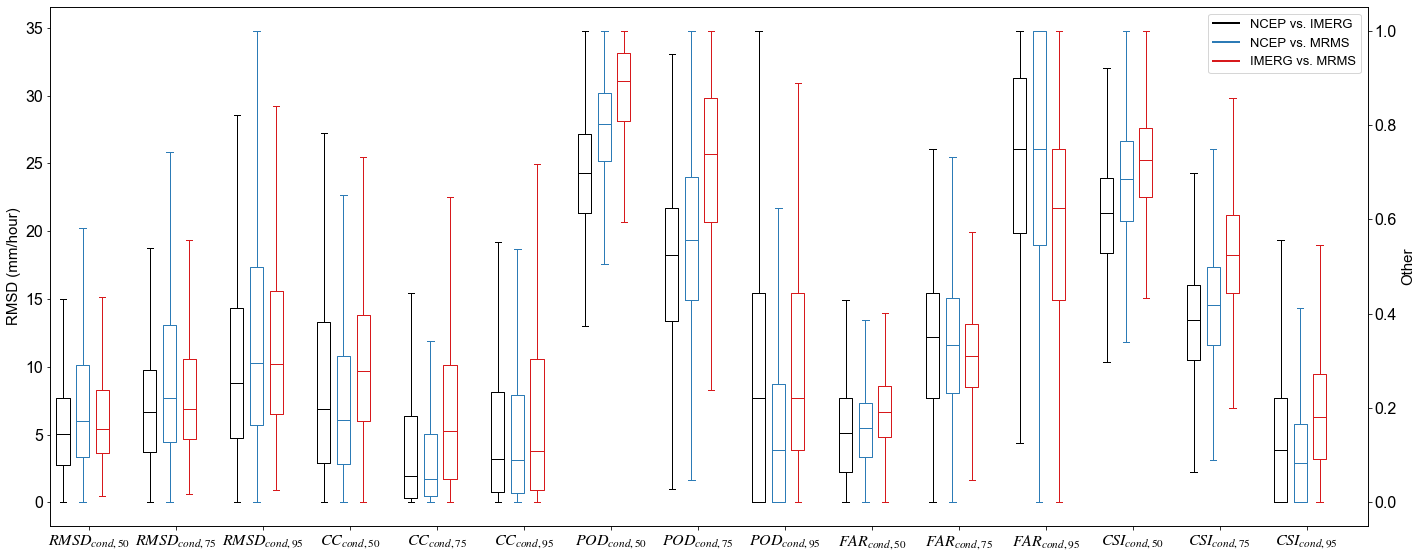

In [46]:
fig, ax= plt.subplots(1,1, figsize=(20,8))
# rmse_positions= np.array([0, 5, 10])
# other_positions= np.array([1,2,3,4,6,7,8,9,11,12,13,14])
positions= np.arange(0,10,10/15)

ax2= ax.twinx()
for i, _df in enumerate([df_gaugeSat, df_gaugeRadar, df_satRadar]):
    _df['50_cc']= _df['50_cc']**2
    _df['75_cc']= _df['75_cc']**2
    _df['95_cc']= _df['95_cc']**2
    for j, col in enumerate(['50_rmse', '75_rmse', '95_rmse', '50_cc', '75_cc', '95_cc', '50_POD', '75_POD',
                            '95_POD', '50_FAR', '75_FAR', '95_FAR', '50_CSI', '75_CSI', '95_CSI']):
        data= _df[col].dropna().values
        if col.find('rmse')>-1:
            box= ax.boxplot(data, positions= [positions[j]+ i*0.15], showfliers=False, widths=0.1) 
        else:
            box= ax2.boxplot(data, positions= [positions[j]+ i*0.15], showfliers=False, widths=0.1) 
        if i==0:
            set_box_color(box, 'black')
        elif i==1:
            set_box_color(box, '#2C7BB6')
        elif i==2:
            set_box_color(box, '#D7191C')
ax.set_xlim([-0.1, 10])
ax.set_xticks([r + 0.2 for r in positions])
ax.set_xticklabels(['$RMSD_{cond,50}$','$RMSD_{cond,75}$','$RMSD_{cond,95}$', '$CC_{cond,50}$', '$CC_{cond,75}$', '$CC_{cond,95}$', '$POD_{cond,50}$', '$POD_{cond,75}$', '$POD_{cond,95}$',
                    '$FAR_{cond,50}$','$FAR_{cond,75}$','$FAR_{cond,95}$', '$CSI_{cond,50}$','$CSI_{cond,75}$',  '$CSI_{cond,95}$' ]);
ax.plot([],c= 'black', label='NCEP vs. IMERG')
ax.plot([],c= '#2C7BB6', label='NCEP vs. MRMS')
ax.plot([],c= '#D7191C', label='IMERG vs. MRMS')
ax.legend()
ax.set_ylabel('RMSD (mm/hour)', fontsize=15)
ax2.set_ylabel('Other', fontsize=15)
#     rmses= _df[['50_rmse', '75_rmse', '95_rmse']].values
#     other= _df.drop(['50_rmse', '75_rmse', '95_rmse'], axis=1).values
#     ax.boxplot(rmses, positions= rmse_positions+ i* 0.3, widths= .2, showfliers=False)
#     ax2= ax.twinx()
#     ax2.boxplot(other, positions= other_positions+ i*0.3, widths=.2, showfliers=False)

In [156]:
df_satRadar.head()

50_rmse     50_cc  50_POD  50_FAR  50_CSI   75_rmse     75_cc  \
(66,107)  0.465211  0.440631     1.0     0.0     1.0  0.632208  0.388271   
(66,108)  0.496472  0.433417     1.0     0.0     1.0  0.653999  0.449079   
(66,109)  0.496264  0.500700     1.0     0.0     1.0  0.667714  0.485766   
(66,110)  0.541321  0.528549     1.0     0.0     1.0  0.753142  0.392798   
(66,111)  0.615981  0.495239     1.0     0.0     1.0  0.860675  0.335945   

          75_POD    75_FAR    75_CSI   95_rmse     95_cc    95_POD    95_FAR  \
(66,107)     1.0  0.000000  1.000000  0.922447 -0.155300  0.666667  0.538462   
(66,108)     1.0  0.000000  1.000000  0.944650 -0.198146  0.555556  0.705882   
(66,109)     1.0  0.000000  1.000000  0.953043 -0.040190  0.555556  0.705882   
(66,110)     1.0  0.000000  1.000000  1.134528  0.053137  0.555556  0.687500   
(66,111)     1.0  0.614679  0.385321  1.362117  0.069136  0.555556  0.687500   

            95_CSI  
(66,107)  0.375000  
(66,108)  0.238095  
(66,109)  0.238095  
(66,110)  0.250000  
(66,111)  0.250000

In [179]:
def norm(x):
    return (x-x.min())/(x.max()-x.min())

In [58]:
# RMSEresults
RMSEresults= []
CCresults = []
for col in ['50_rmse', '75_rmse', '95_rmse']:
    RMSEresults.append(np.log(df_gaugeRadar.loc[:,col].dropna().values))
    RMSEresults.append(np.log(df_gaugeSat.loc[:,col].dropna().values))
    RMSEresults.append(np.log(df_satRadar.loc[:,col].dropna().values))
for col in ['50_cc', '75_cc', '95_cc']:
    CCresults.append(df_gaugeRadar.loc[:, col].dropna().values**2)
    CCresults.append(df_gaugeSat.loc[:, col].dropna().values**2)
    CCresults.append(df_satRadar.loc[:, col].dropna().values**2)
RMSEresults.append(metrics(radar_rmse, core_shp))
RMSEresults.append(metrics(satellite_rmse, core_shp))
RMSEresults.append(metrics(gauge_rmse, core_shp))
CCresults.append(metrics(radar_cc, core_shp))
CCresults.append(metrics(satellite_cc, core_shp))
CCresults.append(metrics(gauge_cc, core_shp))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


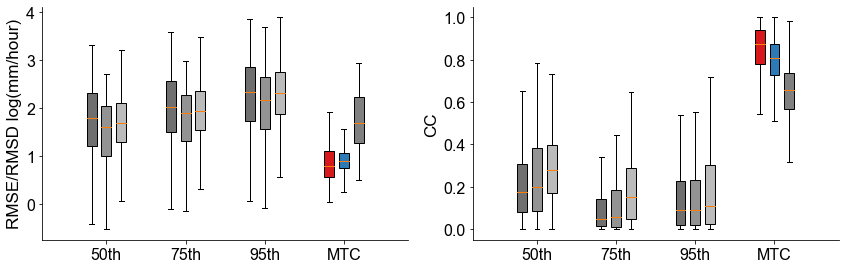

In [59]:
colors= ['#6F6F6F', '#939393', '#BBBBBB', '#D7191C','#2C7BB6','grey']
positions= [0.85, 1, 1.15, 1.65, 1.8, 1.95, 2.45, 2.6, 2.75, 3.25, 3.4, 3.55]
fig, ax = plt.subplots(1,2,figsize=(12,4))
bx1=ax[0].boxplot(RMSEresults, showfliers=False, widths=0.1, positions= positions, patch_artist=True)
ax[0].set_xticks([1, 1.8, 2.6, 3.4])
ax[0].set_xticklabels(['50th', '75th', '95th', 'MTC'])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel('RMSE/RMSD log(mm/hour)')
ax[0].bar([],[], label='MRMS', color='#D7191C')

for i, patch in enumerate(bx1['boxes']):
    if i<9: j=i%3;
    else: j=i%3+3;
    patch.set_facecolor(colors[j])

# ax[0].legend([bx1["boxes"][0], bx1["boxes"][1], 
#            bx1['boxes'][2], bx1['boxes'][3],
#            bx1['boxes'][4], bx1['boxes'][5]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',
#                                                'MRMS(MTC)', 'IMERG(MTC)', 'NCEP(MTC)'], loc='upper right')

bx2= ax[1].boxplot(CCresults, widths=.1, showfliers=False, positions= positions, patch_artist=True)
# ax[1].set_xlim([0.5,3.5])
ax[1].set_xticks([1, 1.8, 2.6, 3.4])

ax[1].set_xticklabels(['50th', '75th', '95th', 'MTC'])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel('CC')

for i, patch in enumerate(bx2['boxes']):
    if i<9: j=i%3;
    else: j=i%3+3;
    patch.set_facecolor(colors[j])
# ax[1].legend([bx2["boxes"][0], bx2["boxes"][1], 
#            bx2['boxes'][2], bx2['boxes'][3],
#            bx2['boxes'][4], bx2['boxes'][5]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',
#                                                'MRMS(MTC)', 'IMERG(MTC)', 'NCEP(MTC)'], loc='upper right')

# fig.savefig('HarveyBoxPlot2.png', dpi=300)

In [71]:
[np.exp(np.nanmedian(r)) for r in RMSEresults]

[5.970199314070807,
 5.005725207639945,
 5.4415144224165495,
 7.658265794717538,
 6.662642664597147,
 6.9021644608696295,
 10.304070293672858,
 8.767076789873922,
 10.220770734021471,
 2.23109,
 2.453366,
 5.3901343]

In [72]:
np.exp(2)

7.38905609893065

In [205]:
results= []
for col in['50_POD', '75_POD', '95_POD', '50_FAR', '75_FAR', '95_FAR','50_CSI', '75_CSI', '95_CSI']:
    results.append(df_gaugeRadar.loc[:, col].dropna().values)
    results.append(df_gaugeSat.loc[:, col].dropna().values)
    results.append(df_satRadar.loc[:, col].dropna().values)
    

In [207]:
len(results)

27

In [208]:
len(positions)

18

[Text(0, 0, '$POD_{cond,50}$'),
 Text(0, 0, '$POD_{cond,75}$'),
 Text(0, 0, '$POD_{cond,95}$'),
 Text(0, 0, '$FAR_{cond,50}$'),
 Text(0, 0, '$FAR_{cond,75}$'),
 Text(0, 0, '$FAR_{cond,95}$'),
 Text(0, 0, '$CSI_{cond,50}$'),
 Text(0, 0, '$CSI_{cond,75}$'),
 Text(0, 0, '$CSI_{cond,95}$')]

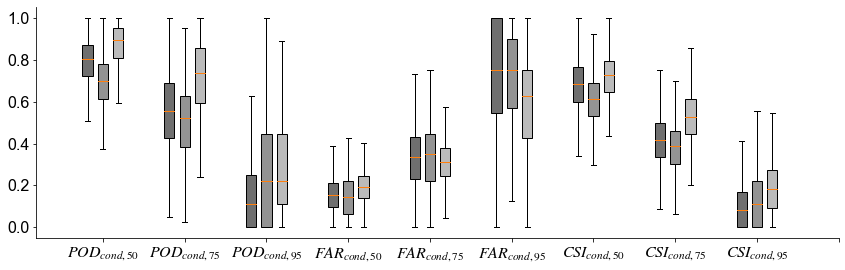

In [210]:
positions= [0.85, 1, 1.15,
            1.65, 1.8, 1.95,
            2.45, 2.6, 2.75,
            3.25, 3.4, 3.55,
            4.05, 4.2, 4.35,
            4.85, 5.0, 5.15,
            5.65, 5.8, 5.95,
            6.45, 6.6, 6.75,
            7.25, 7.4, 7.55,
#             8.05, 8.2, 8.35,
           ]
fig=plt.figure(figsize=(12,4))
ax= fig.add_subplot()
bx= ax.boxplot(results, positions= positions, widths=0.1,
               patch_artist= True, showfliers=False)

for i, patch in enumerate(bx['boxes']):
    j= i%3
    patch.set_facecolor(colors[j])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([1,1.8, 2.6,3.4,4.2,5.0, 5.8, 6.6, 7.4, 8.2])
ax.set_xticklabels(['$POD_{cond,50}$','$POD_{cond,75}$','$POD_{cond,95}$' ,
                    '$FAR_{cond,50}$','$FAR_{cond,75}$','$FAR_{cond,95}$' ,
                   '$CSI_{cond,50}$','$CSI_{cond,75}$','$CSI_{cond,95}$'])
# ax.legend([bx["boxes"][0], bx["boxes"][1], 
#            bx['boxes'][2]], ['NCEP vs. MRMS', 'NCEP vs. IMERG', 'IMERG vs. MRMS',], loc='upper center')
# fig.savefig('HarveyBoxPlot2.png', dpi=300)

In [211]:
fig.savefig('conditionalMetrics2.png', dpi=300)

{'whiskers': [<matplotlib.lines.Line2D at 0x123948750>,
 'caps': [<matplotlib.lines.Line2D at 0x12381d710>,
 'boxes': [<matplotlib.lines.Line2D at 0x123924d50>,
 'medians': [<matplotlib.lines.Line2D at 0x1237e8b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12381d2d0>,
 'means': []}

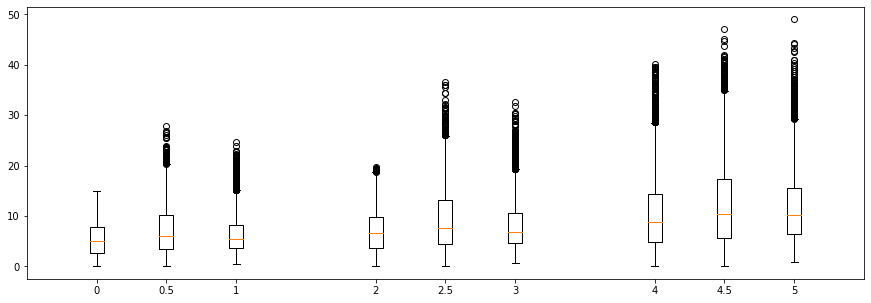

In [57]:
fig, ax= plt.subplots(1,1, figsize=(15,5))
ax.boxplot([df_gaugeSat['50_rmse'].dropna().values, df_gaugeSat['75_rmse'].dropna().values, df_gaugeSat['95_rmse'].dropna().values], positions= [0,2,4], widths=0.1,)
ax.boxplot([df_gaugeRadar['50_rmse'].dropna().values, df_gaugeRadar['75_rmse'].dropna().values, df_gaugeRadar['95_rmse'].dropna().values], positions= [0.5,2.5,4.5], widths=0.1)
ax.boxplot([df_satRadar['50_rmse'].dropna().values, df_satRadar['75_rmse'].dropna().values, df_satRadar['95_rmse'].dropna().values], positions= [1,3,5], widths=0.1)

In [6]:
NCEP_rmse= mask_raster('intercomparison/gauge/rmse.tif', harveyimpact)
NCEP_cc = mask_raster('intercomparison/gauge/r.tif', harveyimpact)
NCEP_sum= mask_raster('intercomparison/gauge/sum_gauge.tif', harveyimpact)
NCEP_POD= mask_raster('intercomparison/gauge/pod.tif', harveyimpact)
NCEP_FAR= mask_raster('intercomparison/gauge/far.tif', harveyimpact)
NCEP_CSI= mask_raster('intercomparison/gauge/csi.tif', harveyimpact)

MRMS_rmse= mask_raster('intercomparison/radar/rmse.tif', harveyimpact)
MRMS_cc= mask_raster('intercomparison/radar/r.tif', harveyimpact)
MRMS_sum= mask_raster('intercomparison/radar/sum_radar.tif', harveyimpact)
MRMS_POD= mask_raster('intercomparison/radar/pod.tif', harveyimpact)
MRMS_FAR= mask_raster('intercomparison/radar/far.tif', harveyimpact)
MRMS_CSI= mask_raster('intercomparison/radar/csi.tif', harveyimpact)

IMERG_rmse= mask_raster('intercomparison/satellite/rmse.tif', harveyimpact)
IMERG_cc= mask_raster('intercomparison/satellite/r.tif', harveyimpact)
IMERG_sum= mask_raster('intercomparison/satellite/sum_satellite.tif', harveyimpact)
IMERG_POD= mask_raster('intercomparison/satellite/pod.tif', harveyimpact)
IMERG_FAR= mask_raster('intercomparison/satellite/far.tif', harveyimpact)
IMERG_CSI= mask_raster('intercomparison/satellite/csi.tif', harveyimpact)

ref_sum= mask_raster('intercomparison/satellite/sum_ref.tif', harveyimpact)

In [165]:
NCEP_rmse= gdal.Open('intercomparison/gauge/rmse.tif').ReadAsArray()
NCEP_cc = gdal.Open('intercomparison/gauge/r.tif').ReadAsArray()
NCEP_sum= gdal.Open('intercomparison/gauge/sum_gauge.tif').ReadAsArray()
NCEP_POD= gdal.Open('intercomparison/gauge/pod.tif').ReadAsArray()
NCEP_FAR= gdal.Open('intercomparison/gauge/far.tif').ReadAsArray()
NCEP_CSI= gdal.Open('intercomparison/gauge/csi.tif').ReadAsArray()

MRMS_rmse= gdal.Open('intercomparison/radar/rmse.tif').ReadAsArray()
MRMS_cc= gdal.Open('intercomparison/radar/r.tif').ReadAsArray()
MRMS_sum= gdal.Open('intercomparison/radar/sum_radar.tif').ReadAsArray()
MRMS_POD= gdal.Open('intercomparison/radar/pod.tif').ReadAsArray()
MRMS_FAR= gdal.Open('intercomparison/radar/far.tif').ReadAsArray()
MRMS_CSI= gdal.Open('intercomparison/radar/csi.tif').ReadAsArray()

IMERG_rmse= gdal.Open('intercomparison/satellite/rmse.tif').ReadAsArray()
IMERG_cc= gdal.Open('intercomparison/satellite/r.tif').ReadAsArray()
IMERG_sum= gdal.Open('intercomparison/satellite/sum_satellite.tif').ReadAsArray()
IMERG_POD= gdal.Open('intercomparison/satellite/pod.tif').ReadAsArray()
IMERG_FAR= gdal.Open('intercomparison/satellite/far.tif').ReadAsArray()
IMERG_CSI= gdal.Open('intercomparison/satellite/csi.tif').ReadAsArray()

ref_sum= IMERG_cc= gdal.Open('intercomparison/satellite/sum_ref.tif').ReadAsArray()

In [22]:
def reshape(src):
#     src= src[66:143, 107:194]
    src= src.reshape(-1,1)
    src= src[~np.isnan(src)]
    src[src<=0.1*7*24]= np.nan
    
    return src

def commonFilter(x, y):
    mask= np.isnan(x) | np.isnan(y) | (x<=0.1*7*24) |(y<=0.1*7*24)
    x= x[~mask]
    y= y[~mask]
    
    x= x.reshape(-1,1).squeeze()
    y= y.reshape(-1,1).squeeze()
    
    return x, y

def rank(x,y,z):
    '''x: NCEP; y: IMERG; z: MRMS'''
    global ref_sum, NCEP_sum, MRMS_sum, IMERG_sum
#     x= x[66:143, 107:194]
#     y= y[66:143, 107:194]
#     z= z[66:143, 107:194]
#     ref_sum= ref_sum[66:143, 107:194]
#     NCEP_sum= NCEP_sum[66:143, 107:194]
#     IMERG_sum= IMERG_sum[66:143, 107:194]
#     MRMS_sum= MRMS_sum[66:143, 107:194]
    
    mask= np.isnan(x) | np.isnan(y) | np.isnan(z) | (NCEP_sum<=0.5) |(MRMS_sum<=0.5) | (IMERG_sum<=0.5)
    x= x[~mask]
    y= y[~mask]
    z= z[~mask]
    ref_sum= ref_sum[~mask]
    MRMS_sum= MRMS_sum[~mask]
    IMERG_sum= IMERG_sum[~mask]
    NCEP_sum= NCEP_sum[~mask]
    
    #normalize by rain rate
    x= np.divide(x, IMERG_sum, where= IMERG_sum!=0)*7*24
    y= np.divide(y, NCEP_sum, where= NCEP_sum!=0)*7*24
    z= np.divide(z, MRMS_sum, where= MRMS_sum!=0)*7*24
    
    x= x.reshape(-1,1).squeeze()
    y= y.reshape(-1,1).squeeze()
    z= z.reshape(-1,1).squeeze()
    
    rank=0
    
#     for i in range(len(x)):
#         if x[i]>=y[i] and y[i]>=z[i]:
#             rank+=1
    print(rank,'/',len(x), rank/len(x))
    print(np.nanmedian(x), np.nanmedian(y), np.nanmedian(z))
    return np.nanmedian(x), np.nanmedian(y), np.nanmedian(z)

In [8]:
IMERG_rmse_norm, NCEP_rmse_norm, MRMS_rmse_norm= rank(IMERG_rmse, NCEP_rmse , MRMS_rmse)

0 / 35074 0.0
3.1803093 3.5950933 2.2860534


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less_equal


No handles with labels found to put in legend.


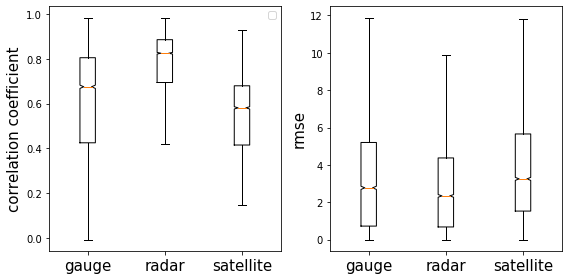

In [223]:
fig, ax= plt.subplots(1,2,figsize=(8,4))
bxl_1= ax[0].boxplot([reshape(NCEP_cc), reshape(MRMS_cc), reshape(IMERG_cc)],
              positions= np.array(range(3)), widths= .2,showfliers=False, notch=True)


ax[0].legend()
ax[0].set_xticks(range(0, 3 ))
ax[0].set_xticklabels(['gauge', 'radar', 'satellite'], fontsize=15)
ax[0].set_ylabel('correlation coefficient', fontsize=15)
# fig.savefig('cc_zone.png', dpi=100)

bxl_1= ax[1].boxplot([reshape(NCEP_rmse), reshape(MRMS_rmse), reshape(IMERG_rmse)],
              positions= np.array(range(3)), widths= .2,showfliers=False, notch=True)


ax[1].set_ylabel('rmse',fontsize=15)
ax[1].set_xticks(range(0, 3))
ax[1].set_xticklabels(['gauge', 'radar', 'satellite'], fontsize=15)
plt.tight_layout()
# fig.savefig('box_plot_stats_zone.png',dpi=100)

In [51]:
from scipy.stats import gaussian_kde

In [69]:
x.sum()

0.0

In [10]:
from scipy.interpolate import interpn

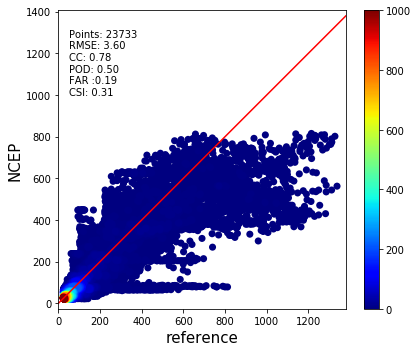

In [16]:
fig= plt.figure(figsize=(6,5))
y, x= commonFilter(NCEP_sum, ref_sum)
data , x_e, y_e = np.histogram2d( x, y, bins = 100)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# ax[0].plot(x, y, 'o')
plt.scatter(x, y, c=z, s=50, edgecolor='', cmap='jet', vmin=0, vmax=1000)
plt.plot([0, max(x.max(), y.max())], [0, max(x.max(), y.max())], 'r')
plt.axis('equal')
plt.text(50,1000,'Points: %d\nRMSE: %.2f\nCC: %.2f\nPOD: %.2f\nFAR :%.2f\nCSI: %.2f'%(len(x), NCEP_rmse_norm, pearsonr(y, x)[0]**2,
                                                                                      np.nanmedian(NCEP_POD), np.nanmedian(NCEP_FAR), np.nanmedian(NCEP_CSI)))
plt.ylabel('NCEP', fontsize=15)
plt.xlim([0, max(x.max(), y.max())])
plt.ylim([0, max(x.max(), y.max())])
plt.xlabel('reference', fontsize=15)
plt.colorbar(orientation= 'vertical')
plt.tight_layout()

In [17]:
fig.savefig('NCEP_vali.png', dpi=144)

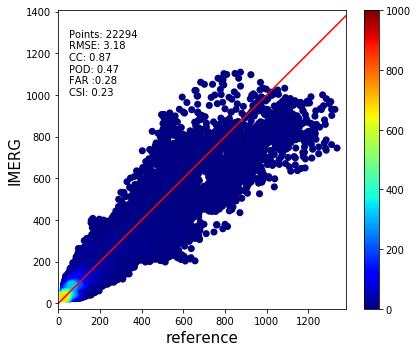

In [18]:
fig= plt.figure(figsize=(6,5))
y, x= commonFilter(IMERG_sum, ref_sum)
data , x_e, y_e = np.histogram2d( x, y, bins = 100)
;s

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# ax[0].plot(x, y, 'o')
plt.scatter(x, y, c=z, s=50, edgecolor='', cmap='jet', vmin=0, vmax=1000)
plt.plot([0, max(x.max(), y.max())], [0, max(x.max(), y.max())], 'r')
plt.axis('equal')
plt.text(50,1000,'Points: %d\nRMSE: %.2f\nCC: %.2f\nPOD: %.2f\nFAR :%.2f\nCSI: %.2f'%(len(x), IMERG_rmse_norm, pearsonr(y, x)[0]**2,
                                                                                      np.nanmedian(IMERG_POD), np.nanmedian(IMERG_FAR), np.nanmedian(IMERG_CSI)))
plt.ylabel('IMERG', fontsize=15)
plt.xlim([0, max(x.max(), y.max())])
plt.ylim([0, max(x.max(), y.max())])
plt.xlabel('reference', fontsize=15)
plt.colorbar(orientation= 'vertical')
plt.tight_layout()

In [19]:
fig.savefig('IMERG_vali.png', dpi=144)

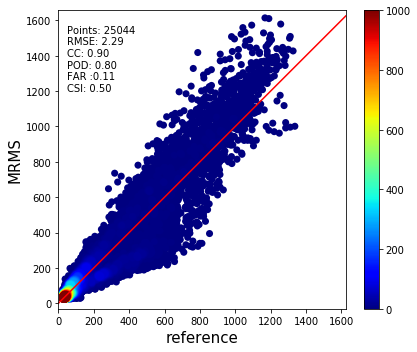

In [20]:
fig= plt.figure(figsize=(6,5))
y, x= commonFilter(MRMS_sum, ref_sum)
data , x_e, y_e = np.histogram2d( x, y, bins = 100)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# ax[0].plot(x, y, 'o')
plt.scatter(x, y, c=z, s=50, edgecolor='', cmap='jet', vmin=0, vmax=1000)
plt.plot([0, max(x.max(), y.max())], [0, max(x.max(), y.max())], 'r')
plt.axis('equal')
plt.text(50,1200,'Points: %d\nRMSE: %.2f\nCC: %.2f\nPOD: %.2f\nFAR :%.2f\nCSI: %.2f'%(len(x), MRMS_rmse_norm, pearsonr(y, x)[0]**2,
                                                                                      np.nanmedian(MRMS_POD), np.nanmedian(MRMS_FAR), np.nanmedian(MRMS_CSI)))
plt.ylabel('MRMS', fontsize=15)
plt.xlim([0, max(x.max(), y.max())])
plt.ylim([0, max(x.max(), y.max())])
plt.xlabel('reference', fontsize=15)
plt.colorbar(orientation= 'vertical')
plt.tight_layout()

In [21]:
fig.savefig('MRMS_vali.png', dpi=144)

In [12]:
from scipy.stats import pearsonr

In [6]:
sat, ref= commonFilter(IMERG_sum, ref_sum)

In [ ]:
def corcoef(x,y):
    return ((x-x.mean())*(y-y.mean())).sum()/((x-x.mean()).sum())**.5/((y-y.mean()).sum())**.5

In [31]:
np.nanquantile(gdal.Open(radar_sum).ReadAsArray().reshape(-1,1), .95)

440.25